In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sklearn
from sklearn.model_selection import train_test_split
# from lazypredict.Supervised import LazyRegressor
# from lazypredict.Supervised import LazyClassifier

/mnt/storageG1/lwang/miniconda3/envs/ml-workshop/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def value_counts_list(lst):
    """
    Computes the frequency count of unique elements in a list and returns a dictionary, sorted by frequency count in
    descending order.

    Args:
    - lst (list): List of elements

    Returns:
    - dict: Dictionary with unique elements as keys and their frequency count as values, sorted by frequency count
    in descending order
    """
    value_counts = {}
    for item in lst:
        if item in value_counts:
            value_counts[item] += 1
        else:
            value_counts[item] = 1
    sorted_value_counts = dict(sorted(value_counts.items(), key=lambda x: x[1], reverse=True))
    return sorted_value_counts

def print_full(x):
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 2000)
    pd.set_option('display.float_format', '{:20,.2f}'.format)
    pd.set_option('display.max_colwidth', None)
    print(x)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.float_format')
    pd.reset_option('display.max_colwidth')

In [3]:
# data = pd.read_csv('./organised_data.csv')
# df_imputed = pd.read_csv('/mnt/storageG1/lwang/Projects/TBpt/Analysis/organised_data_mean_imput.csv')

In [4]:
clinical_biochem = pd.read_csv('../Clinical/TB_Portals_Published_Clinical_Data_August_2023/TB_Portals_Biochemistry_August_2023.csv') #blood test measurements
clinical_DST = pd.read_csv('../Clinical/TB_Portals_Published_Clinical_Data_August_2023/TB_Portals_DST_August_2023.csv') # mostly empty
clinical_patient = pd.read_csv('../Clinical/TB_Portals_Published_Clinical_Data_August_2023/TB_Portals_Patient_Cases_August_2023.csv') # body, background, diagnostic detail
clinical_regimens = pd.read_csv('../Clinical/TB_Portals_Published_Clinical_Data_August_2023/TB_Portals_Regimens_August_2023.csv') #outcome. drug regimen, same patient id number as clinical_patient as cases
clinical_specimen = pd.read_csv('../Clinical/TB_Portals_Published_Clinical_Data_August_2023/TB_Portals_Specimen_August_2023.csv') # collection dates and source - no use
clinical_genomics = pd.read_csv('/mnt/storageG1/lwang/Projects/TBpt/Genomic/TB_Portals_Published_Genomics_Data_August_2023/TB_Portals_Sequenced_DST_August_2023.csv') # no use - only DST data
genomics = pd.read_csv('/mnt/storageG1/lwang/Projects/TBpt/Genomic/TB_Portals_Published_Genomics_Data_August_2023/TB_Portals_Genomics_August_2023.csv')

/tmp/ipykernel_90795/1554589996.py:2: DtypeWarning: Columns (33,40,41,55,60,61,63,65,66,68,69,71,72,74,82,100,102,106,107,108,109,110,111,113,119,127,128,129,133,135,138,139,140) have mixed types. Specify dtype option on import or set low_memory=False.
  clinical_DST = pd.read_csv('../Clinical/TB_Portals_Published_Clinical_Data_August_2023/TB_Portals_DST_August_2023.csv') # mostly empty
/tmp/ipykernel_90795/1554589996.py:3: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  clinical_patient = pd.read_csv('../Clinical/TB_Portals_Published_Clinical_Data_August_2023/TB_Portals_Patient_Cases_August_2023.csv') # body, background, diagnostic detail
/tmp/ipykernel_90795/1554589996.py:6: DtypeWarning: Columns (33,40,41,55,60,66,68,71,72,82,106,109,110,111,113,119,125,127,128,129,130,131,132,134,135,138,139,140) have mixed types. Specify dtype option on import or set low_memory=False.
  clinical_genomics = pd.read_csv('/mnt/storageG1/lwang/Proj

In [30]:
print(clinical_biochem.shape)
print(clinical_DST.shape)
print(clinical_patient.shape)
print(clinical_regimens.shape)
print(clinical_genomics.shape)


(6448, 42)
(116110, 179)
(11282, 222)
(16000, 13)
(19363, 179)


In [31]:
print('main_lineage' in clinical_regimens)
print('main_lineage' in clinical_DST)
print('main_lineage' in clinical_patient)
print('main_lineage' in clinical_genomics)

False
False
True
False


In [32]:
clinical_patient[clinical_patient['main_lineage']=='Not Reported']['condition_id']

0        000082c8-7aef-477e-99d1-43ee13e85e6f
4        000e6c93-e6bc-4769-9b5f-79bf4ac2aa60
5        000e8380-6ea7-4fdf-aadb-2d3b727f8817
6        00178486-36bb-40b8-ba7d-b65de096d5e5
8        002cea6e-758b-4e65-b4c4-ae0155a458d8
                         ...                 
11276    ffe7195d-cc6b-423f-9f7f-95a725b8f8ca
11278    fff3a550-d2ed-41bc-8584-8657bcbc7331
11279    fffa8857-b056-4a5c-b629-9b16f29c7efb
11280    fffb6e1b-123f-46b3-ad90-ac414c74a58a
11281    fffd5149-8344-4aaa-bcee-c0aaa0644a3a
Name: condition_id, Length: 7157, dtype: object

In [33]:
# clinical_genomics[clinical_genomics['specimen_id'].isin(clinical_patient[clinical_patient['main_lineage']=='Not Reported']['specimen_id'])]

In [34]:
clinical_genomics

,condition_id,specimen_id,observation_id,test_date,specimen_collection_site,specimen_collection_date,cultureresults,firstcultureresults,culturetype,microscopyresults,...,truenat_mycobutin,truenat_delamanid,truenat_bedaquiline,truenat_imipenem_cilastatin,truenat_linezolid,truenat_clofazimine,truenat_clarithromycin,truenat_fluoroquinolones,truenat_aminoglycosides_injectible_agents,truenat_ethionamide
0,0000f7e6-bbd2-468d-834d-f14948c5d902,f8a24fea-dd9a-4289-926a-03877f789f68,374dc09a-9c1e-4d86-a942-c82c9bcba121,6,sputum,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000f7e6-bbd2-468d-834d-f14948c5d902,f8a24fea-dd9a-4289-926a-03877f789f68,5156db86-81eb-464f-96db-c19aae0ff0ad,0,sputum,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000f7e6-bbd2-468d-834d-f14948c5d902,f8a24fea-dd9a-4289-926a-03877f789f68,556acbea-0234-42df-98be-80e6b91e453d,1,sputum,0,Positive,Positive,Liquid,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000f7e6-bbd2-468d-834d-f14948c5d902,f8a24fea-dd9a-4289-926a-03877f789f68,97569f7e-1b24-4cb0-8210-1bd02882594e,1,sputum,0,NaN,NaN,NaN,10 to 99 in 100 (1+),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000f7e6-bbd2-468d-834d-f14948c5d902,f8a24fea-dd9a-4289-926a-03877f789f68,fefe9b6f-2de8-43d7-b87f-61cd0f1e4cb6,18,sputum,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19358,ffd62357-f912-40c0-9669-3032048e2acc,a8536c2b-6215-45f1-8ab8-ab35b3716729,f1d74bd9-2d96-4f13-a6bd-3dfa49452656,0,sputum,0,Negative,Negative,Solid,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19359,fff0fd7b-43ac-4a3f-a5bd-665e787d9a41,7f92ca1b-7b01-4505-816a-436145685a8e,11a3ba0d-6a8d-4317-ba25-d6a9bd981856,40,other,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19360,fff0fd7b-43ac-4a3f-a5bd-665e787d9a41,7f92ca1b-7b01-4505-816a-436145685a8e,14aad01f-8bf6-4412-8fe6-ef22f8c7c8d4,0,other,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19361,fff0fd7b-43ac-4a3f-a5bd-665e787d9a41,7f92ca1b-7b01-4505-816a-436145685a8e,7e20ba96-7796-4c17-859c-132e9b9f7a07,393,other,0,More than 200,More than 200,Solid,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
# print(clinical_biochem.head())
# print(clinical_DST.head())
# print(clinical_patient.head())
# print(clinical_regimens.head())
# print(clinical_genomics.head())

In [36]:
clinical_ = clinical_patient[['condition_id','country', 'culture',
'microscopy',
'bactec_test',
'le_test',
'hain_test',
'lpaother_test',
'genexpert_test',
'bactec_isoniazid',
'bactec_rifampicin',
'bactec_streptomycin',
'bactec_ethambutol',
'bactec_ofloxacin',
'bactec_capreomycin',
'bactec_amikacin',
'bactec_kanamycin',
'bactec_pyrazinamide',
'bactec_levofloxacin',
'bactec_moxifloxacin',
'bactec_p_aminosalicylic_acid',
'bactec_prothionamide',
'bactec_cycloserine',
'bactec_amoxicillin_clavulanate',
'bactec_mycobutin',
'bactec_delamanid',
'bactec_bedaquiline',
'bactec_imipenem_cilastatin',
'bactec_linezolid',
'bactec_clofazimine',
'bactec_clarithromycin',
'bactec_fluoroquinolones',
'bactec_aminoglycosides_injectible_agents',
'le_isoniazid',
'le_rifampicin',
'le_streptomycin',
'le_ethambutol',
'le_ofloxacin',
'le_capreomycin',
'le_amikacin',
'le_kanamycin',
'le_pyrazinamide',
'le_levofloxacin',
'le_moxifloxacin',
'le_p_aminosalicylic_acid',
'le_prothionamide',
'le_cycloserine',
'le_amoxicillin_clavulanate',
'le_mycobutin',
'le_delamanid',
'le_bedaquiline',
'le_imipenem_cilastatin',
'le_linezolid',
'le_clofazimine',
'le_clarithromycin',
'le_fluoroquinolones',
'le_aminoglycosides_injectible_agents',
'hain_isoniazid',
'hain_rifampicin',
'hain_streptomycin',
'hain_ethambutol',
'hain_ofloxacin',
'hain_capreomycin',
'hain_amikacin',
'hain_kanamycin',
'hain_pyrazinamide',
'hain_levofloxacin',
'hain_moxifloxacin',
'hain_p_aminosalicylic_acid',
'hain_prothionamide',
'hain_cycloserine',
'hain_amoxicillin_clavulanate',
'hain_mycobutin',
'hain_delamanid',
'hain_bedaquiline',
'hain_imipenem_cilastatin',
'hain_linezolid',
'hain_clofazimine',
'hain_clarithromycin',
'hain_fluoroquinolones',
'hain_aminoglycosides_injectible_agents',
'lpaother_isoniazid',
'lpaother_rifampicin',
'lpaother_streptomycin',
'lpaother_ethambutol',
'lpaother_ofloxacin',
'lpaother_capreomycin',
'lpaother_amikacin',
'lpaother_kanamycin',
'lpaother_pyrazinamide',
'lpaother_levofloxacin',
'lpaother_moxifloxacin',
'lpaother_p_aminosalicylic_acid',
'lpaother_prothionamide',
'lpaother_cycloserine',
'lpaother_amoxicillin_clavulanate',
'lpaother_mycobutin',
'lpaother_delamanid',
'lpaother_bedaquiline',
'lpaother_imipenem_cilastatin',
'lpaother_linezolid',
'lpaother_clofazimine',
'lpaother_clarithromycin',
'lpaother_fluoroquinolones',
'lpaother_aminoglycosides_injectible_agents',
'genexpert_isoniazid',
'genexpert_rifampicin',
'truenat_rifampicin']]
genomics_ = genomics[['condition_id','sra_id']]
clinical_dr= pd.merge(genomics_, clinical_, on='condition_id', how='left')
clinical_dr.drop(columns=['condition_id'], inplace=True)

In [37]:
# clinical_dr.to_csv('clinical_dr.csv', index=False)

In [39]:
# sub_df = clinical_patient.dropna(subset=['timika_score', 'outcome']) ## use this to generate data with no na in outcome
sub_df = clinical_patient


In [43]:
sub_df = sub_df[~sub_df['outcome'].isin(['Lost to follow up', 'Unknown', 'Still on treatment','Completed'])]
sub_df['outcome'].replace({'Cured': 1, 'Died': 0, 'Failure': 0, 'Palliative Care': 0}, inplace=True)

/tmp/ipykernel_117222/3087341429.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sub_df['outcome'].replace({'Cured': 1, 'Died': 0, 'Failure': 0, 'Palliative Care': 0}, inplace=True)
/tmp/ipykernel_117222/3087341429.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sub_df['outcome'].replace({'C

In [44]:
pearson_corr = sub_df['timika_score'].corr(sub_df['outcome'], method='pearson')

# Calculate Spearman correlation
spearman_corr = sub_df['timika_score'].corr(sub_df['outcome'], method='spearman')

# Print the correlation results
print(f"Pearson Correlation: {pearson_corr:.4f}")
print(f"Spearman Correlation: {spearman_corr:.4f}")


Pearson Correlation: -0.1882
Spearman Correlation: -0.1762


# Data explore

In [45]:
print('bactec results======')
print(clinical_patient['bactec_test'].value_counts())
print('leresults======')
print(clinical_patient['le_test'].value_counts())
print('lpaotherresults=====')
print(clinical_patient['lpaother_test'].value_counts())
print('hainresults=====')
print(clinical_patient['hain_test'].value_counts())
print('genexpertresults=======')
print(clinical_patient['genexpert_test'].value_counts())

# bactec_test
# le_test
# hain_test
# lpaother_test
# genexpert_test

bactec results======
bactec_test
R, S            4681
Not Reported    3730
S               2349
R                461
I, R, S           48
I, S              11
I                  1
I, R               1
Name: count, dtype: int64
leresults======
le_test
Not Reported    6199
R, S            2628
S               1812
R                557
I, R, S           77
I, R               6
I, S               3
Name: count, dtype: int64
lpaotherresults=====
lpaother_test
Not Reported    9171
S               1269
R, S             685
R                145
I, S               6
I                  3
I, R, S            3
Name: count, dtype: int64
hainresults=====
hain_test
Not Reported    6390
S               2267
R               1567
R, S            1051
I, R               3
I, S               2
I, R, S            1
I                  1
Name: count, dtype: int64
genexpertresults=======
genexpert_test
R               4092
S               3524
Not Reported    3439
R, S             218
I                  7
I, 

In [46]:
columns_to_check = ['bactec_test', 'le_test', 'hain_test', 'lpaother_test', 'genexpert_test']

# Check if all specified columns have "Not Reported" in each row
not_reported_rows = clinical_patient[columns_to_check].eq('Not Reported').all(axis=1)

# Count the number of such rows
not_reported_count = not_reported_rows.sum()


In [47]:
import pandas as pd
from collections import Counter

# Ranking of tests
ranking = {
    'genexpert_test': 1,
    'hain_test': 2,
    'lpaother_test': 3,
    'bactec_test': 4,
    'le_test': 5
}

# Function to determine the majority decision based on the rules
def majority_vote(row):
    # Filter out "Not Reported" values
    reported_values = [row[col] for col in row.index if row[col] != 'Not Reported']
    
    # If all values are "Not Reported"
    if not reported_values:
        return 'Not Reported'
    
    # Count the occurrences of each value
    counter = Counter(reported_values)
    most_common = counter.most_common()
    
    # If there's a clear majority
    if len(most_common) == 1 or most_common[0][1] > most_common[1][1]:
        return most_common[0][0]
    
    # If there's a tie, use the ranking to determine the decision
    if len(most_common) > 1 and most_common[0][1] == most_common[1][1]:
        # Get the highest ranked value according to the ranking system
        highest_ranked_value = None
        highest_rank = float('inf')
        for value in reported_values:
            for test in ranking:
                if row[test] == value and ranking[test] < highest_rank:
                    highest_ranked_value = value
                    highest_rank = ranking[test]
        return highest_ranked_value

# Apply the function to each row and create a new column for the results
# df['majority_decision'] = df.apply(majority_vote, axis=1)

# print(df)

In [48]:
clinical_patient_tests = clinical_patient[['bactec_test', 'le_test', 'hain_test', 'lpaother_test', 'genexpert_test']]

In [49]:
# for x in clinical_patient.columns:
#     print(clinical_patient[clinical_patient[x]=='Not Reported'] or ].shape)
    
ok_features = []
for x in clinical_patient.columns:
    # print('===============')
    if 'Not Reported' in clinical_patient[x].value_counts().keys():
        # print(x,'|', 'Not Reported:','|', clinical_patient[x].value_counts()['Not Reported'], '|', round(clinical_patient[x].value_counts()['Not Reported']/clinical_patient.shape[0], 2))
        if round(clinical_patient[x].value_counts()['Not Reported']/clinical_patient.shape[0], 2) < 0.5:
            ok_features.append(x)
            print(x,'|', 'Not Reported:','|', clinical_patient[x].value_counts()['Not Reported'], '|', round(clinical_patient[x].value_counts()['Not Reported']/clinical_patient.shape[0], 2))
            
    else:
        ok_features.append(x)   
        print(x)


condition_id
patient_id
identifier
registration_date
age_of_onset
gender
country
education | Not Reported: | 4017 | 0.36
employment | Not Reported: | 923 | 0.08
number_of_children
number_of_daily_contacts
case_definition
diagnosis_code | Not Reported: | 1 | 0.0
type_of_resistance
bmi
lung_localization
x_ray_count
status
organization
overall_percent_of_abnormal_volume | Not Reported: | 3139 | 0.28
pleural_effusion_percent_of_hemithorax_involved | Not Reported: | 3139 | 0.28
ispleuraleffusionbilateral | Not Reported: | 3139 | 0.28
other_non_tb_abnormalities | Not Reported: | 3139 | 0.28
are_mediastinal_lymphnodes_present | Not Reported: | 3139 | 0.28
rater | Not Reported: | 3139 | 0.28
timika_score
collapse | Not Reported: | 3146 | 0.28
smallcavities | Not Reported: | 3143 | 0.28
mediumcavities | Not Reported: | 3144 | 0.28
largecavities | Not Reported: | 3146 | 0.28
isanylargecavitybelongtoamultisextantcavity | Not Reported: | 3140 | 0.28
canmultiplecavitiesbeseen | Not Reported: | 3140

In [50]:
# clinical_patient = clinical_patient[clinical_patient['majority_decision'] != 'Not Reported']

In [51]:
clinical_patient['smallcavities']

0        Lower Left Sextant-No, Lower Right Sextant-No,...
1        Lower Left Sextant-No, Middle Left Sextant-No,...
2        Lower Right Sextant-No, Middle Right Sextant-Y...
3        Middle Left Sextant-No, Upper Left Sextant-Yes...
4        Lower Left Sextant-No, Lower Right Sextant-No,...
                               ...                        
11277    Lower Right Sextant-No, Middle Right Sextant-N...
11278    Middle Left Sextant-No, Upper Left Sextant-No,...
11279    Lower Left Sextant-No, Lower Right Sextant-No,...
11280      Middle Right Sextant-No, Upper Right Sextant-No
11281    Middle Left Sextant-No, Upper Left Sextant-No,...
Name: smallcavities, Length: 11282, dtype: object

In [52]:
# Sample data
data = """
education | Not Reported: | 3976
image_body_site | Not Reported: | 9840
dissemination | Not Reported: | 9836
lungcavity_size | Not Reported: | 9838
anomaly_of_mediastinum_vessels_develop | Not Reported: | 9958
affect_pleura | Not Reported: | 9942
shadow_pattern | Not Reported: | 9860
affect_level | Not Reported: | 9994
pneumothorax | Not Reported: | 9840
plevritis | Not Reported: | 9841
affected_segments | Not Reported: | 9843
nodicalcinatum | Not Reported: | 9840
process_prevalence | Not Reported: | 9841
thromboembolism_of_the_pulmonaryartery | Not Reported: | 9973
posttbresiduals | Not Reported: | 9842
lung_capacity_decrease | Not Reported: | 9838
bronchial_obstruction | Not Reported: | 9964
anomaly_of_lungdevelop | Not Reported: | 9840
accumulation_of_contrast | Not Reported: | 9991
limfoadenopatia | Not Reported: | 9843
totalcavernum | Not Reported: | 9838

overall_percent_of_abnormal_volume | Not Reported: | 3074
pleural_effusion_percent_of_hemithorax_involved | Not Reported: | 3074
ispleuraleffusionbilateral | Not Reported: | 3074
other_non_tb_abnormalities | Not Reported: | 3074
are_mediastinal_lymphnodes_present | Not Reported: | 3074
collapse | Not Reported: | 3081
smallcavities | Not Reported: | 3078
mediumcavities | Not Reported: | 3079
largecavities | Not Reported: | 3081
isanylargecavitybelongtoamultisextantcavity | Not Reported: | 3075
canmultiplecavitiesbeseen | Not Reported: | 3075
infiltrate_lowgroundglassdensity | Not Reported: | 3074
infiltrate_mediumdensity | Not Reported: | 3078
infiltrate_highdensity | Not Reported: | 3079
smallnodules | Not Reported: | 3077
mediumnodules | Not Reported: | 3078
largenodules | Not Reported: | 3082
hugenodules | Not Reported: | 3082
isanycalcifiedorpartiallycalcifiednoduleexist | Not Reported: | 3075
isanynoncalcifiednoduleexist | Not Reported: | 3075
isanyclusterednoduleexists | Not Reported: | 3075
aremultiplenoduleexists | Not Reported: | 3076
lowgroundglassdensityactivefreshnodules | Not Reported: | 3076
mediumdensitystabalizedfibroticnodules | Not Reported: | 3078
highdensitycalcifiedtypicallysequella | Not Reported: | 3082
"""

# Split the data into lines
lines = data.strip().split('\n')

# Extract the first item in each row
first_items = [line.split('|')[0].strip() for line in lines]

# Print the result
for item in first_items:
    print(item)


education
image_body_site
dissemination
lungcavity_size
anomaly_of_mediastinum_vessels_develop
affect_pleura
shadow_pattern
affect_level
pneumothorax
plevritis
affected_segments
nodicalcinatum
process_prevalence
thromboembolism_of_the_pulmonaryartery
posttbresiduals
lung_capacity_decrease
bronchial_obstruction
anomaly_of_lungdevelop
accumulation_of_contrast
limfoadenopatia
totalcavernum

overall_percent_of_abnormal_volume
pleural_effusion_percent_of_hemithorax_involved
ispleuraleffusionbilateral
other_non_tb_abnormalities
are_mediastinal_lymphnodes_present
collapse
smallcavities
mediumcavities
largecavities
isanylargecavitybelongtoamultisextantcavity
canmultiplecavitiesbeseen
infiltrate_lowgroundglassdensity
infiltrate_mediumdensity
infiltrate_highdensity
smallnodules
mediumnodules
largenodules
hugenodules
isanycalcifiedorpartiallycalcifiednoduleexist
isanynoncalcifiednoduleexist
isanyclusterednoduleexists
aremultiplenoduleexists
lowgroundglassdensityactivefreshnodules
mediumdensitysta

## Data gen

In [53]:
clinical_patient.columns

Index(['condition_id', 'patient_id', 'identifier', 'registration_date',
       'age_of_onset', 'gender', 'country', 'education', 'employment',
       'number_of_children',
       ...
       'uiip_foci_left_upper_sextant', 'uiip_foci_right_lower_sextant',
       'uiip_foci_right_middle_sextant', 'uiip_foci_right_upper_sextant',
       'uiip_caverns_left_lower_sextant', 'uiip_caverns_left_middle_sextant',
       'uiip_caverns_left_upper_sextant', 'uiip_caverns_right_lower_sextant',
       'uiip_caverns_right_middle_sextant',
       'uiip_caverns_right_upper_sextant'],
      dtype='object', length=222)

In [54]:
for x in clinical_patient.columns:
    print(x)

condition_id
patient_id
identifier
registration_date
age_of_onset
gender
country
education
employment
number_of_children
number_of_daily_contacts
case_definition
diagnosis_code
type_of_resistance
bmi
lung_localization
x_ray_count
status
organization
image_body_site
dissemination
lungcavity_size
anomaly_of_mediastinum_vessels_develop
affect_pleura
shadow_pattern
affect_level
pneumothorax
plevritis
affected_segments
nodicalcinatum
process_prevalence
thromboembolism_of_the_pulmonaryartery
posttbresiduals
lung_capacity_decrease
bronchial_obstruction
anomaly_of_lungdevelop
accumulation_of_contrast
limfoadenopatia
totalcavernum
overall_percent_of_abnormal_volume
pleural_effusion_percent_of_hemithorax_involved
ispleuraleffusionbilateral
other_non_tb_abnormalities
are_mediastinal_lymphnodes_present
rater
timika_score
collapse
smallcavities
mediumcavities
largecavities
isanylargecavitybelongtoamultisextantcavity
canmultiplecavitiesbeseen
infiltrate_lowgroundglassdensity
infiltrate_mediumdensity

In [55]:
import pandas as pd

_ = []
for x in clinical_patient['comorbidity'].unique():
    if pd.isna(x):  # Use pd.isna() to check for NaN values
        continue  # Skip NaN values
    for y in x.split(','):
        y = y.strip()  # Remove leading/trailing whitespace
        if y not in _:  # Add to the list if it's not already present
            _.append(y)


In [56]:
_

['Anemia',
 'HIV',
 'Others',
 'Not specified',
 'Diabetes',
 'Hepatitis C',
 'Psychiatric illness',
 'Post-COVID-19',
 'Renal disease',
 'Hepatic diseases',
 'None',
 'COVID-19',
 'Hepatitis B',
 'Systemically administered glucocorticoids',
 'cytostatics',
 'TNF-α antagonists',
 'Pneumoconiosis']

In [57]:
selected_features = ['country', 
'timika_score', # ?
'education', 
'gender', 
'employment', 
'type_of_resistance', 
'number_of_daily_contacts',
'bmi',
'lung_localization',
# 'dissemination', # high missing
# 'pleural_effusion_percent_of_hemithorax_involved',
# 'pneumothorax', # high missing
# 'process_prevalence', # high missing
# 'lung_capacity_decrease', # high missing
'totalcavernum', 
'case_definition',
'diagnosis_code',
'comorbidity',
# 'culture', 
# 'microscopy', 
'social_risk_factors',
'outcome']  

# for x in selected_features:
#     print(x)
#     print(clinical_patient[x].shape)
clinical_patient[selected_features]

,country,timika_score,education,gender,employment,type_of_resistance,number_of_daily_contacts,bmi,lung_localization,totalcavernum,case_definition,diagnosis_code,comorbidity,social_risk_factors,outcome
0,Kazakhstan,96.0,Basic school (incl. primary),Male,Unemployed,Sensitive,0,15.9,Pulmonary,Not Reported,New,A15.0,"Anemia, HIV, Others",Not Reported,Completed
1,Georgia,20.0,Not Reported,Male,Unemployed,Sensitive,NaN,NaN,Pulmonary,Not Reported,New,A15.0,NaN,Not Reported,Cured
2,Georgia,90.0,Not Reported,Male,Employed,Sensitive,NaN,NaN,Pulmonary,Not Reported,New,A15.1,NaN,Not Reported,Cured
3,Georgia,61.0,Not Reported,Female,Unemployed,Sensitive,NaN,NaN,Pulmonary,Not Reported,New,A15.0,NaN,Not Reported,Cured
4,Georgia,68.0,Not Reported,Male,Unemployed,Sensitive,NaN,NaN,Pulmonary,Not Reported,New,A15.0,NaN,Not Reported,Cured
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11277,Kazakhstan,4.0,"Complete school (a-level, gymnasium)",Male,Employed,Mono DR,3,21.1,Pulmonary,Not Reported,New,A16.0,"Not specified, Systemically administered gluco...",Not Reported,Still on treatment
11278,Ukraine,24.0,"Complete school (a-level, gymnasium)",Male,Unemployed,Sensitive,1,19.8,Pulmonary,Not Reported,Other,A15.0,NaN,"Current smoker, Patient alcohol abuse",Lost to follow up
11279,Ukraine,104.0,Not Reported,Male,Unemployed,MDR non XDR,NaN,23.8,Pulmonary,Not Reported,New,A15.0,NaN,Current smoker,Cured
11280,Ukraine,64.0,"Complete school (a-level, gymnasium)",Male,Unemployed,MDR non XDR,3,16.7,Pulmonary,Not Reported,Chronic TB,A15.0,NaN,Current smoker,Died


In [58]:
for x in clinical_patient[selected_features].columns:
    print('--------------------')
    print('Column name:', x)
    
    print('Column values',clinical_patient[x].unique())

--------------------
Column name: country
Column values ['Kazakhstan' 'Georgia' 'Romania' 'Moldova' 'Ukraine' 'Nigeria' 'Belarus'
 'Azerbaijan' 'Kyrgyzstan' 'South Africa' 'China' 'India' 'Senegal']
--------------------
Column name: timika_score
Column values [ 96.  20.  90.  61.  68.  nan  30.  53.  74.  62.  25.  10.  65. 100.
  80.  12.  13.  17.   0.  34.  18.  57.  50.   5.  95.   9.  35.  14.
 136.  15.  60.  93. 120.  36.   8.  16.  69.  31.  91.  72. 135.  66.
  89.   6.  67.  75.  26.  24.  45.  86.   2.  40.  83.  37.   3.  97.
 108. 115.   7.   1.  56.  42.  71.  70. 114.  28.  49.  46.  59.  88.
 113.  54.  51.  55.  22.  64.  23.   4. 104.  82.  21.  38. 105. 125.
  84.  32.  98.  63.  92.  87.  47.  78. 102.  27. 101. 110.  76.  52.
  11.  85.  81. 116. 140. 107. 111.  79.  43. 103.  73. 122. 128.  77.
 112.  48.  99.  94. 129.  58.  44. 130.  19.  41. 132. 131. 117. 121.
 109. 124.  39. 118. 134. 106. 138. 126.  29. 123. 127. 133. 137.  33.
 119.]
--------------------
Co

In [59]:
_ = []
for x in clinical_patient['social_risk_factors'].unique():
    for y in x.split(','):
        if y.strip() in _:
            pass
        else:
            _.append(y.strip())    

In [60]:
# tb_susceptibility_order = {
#     'Homeless': 13,
#     'Ex prisoner': 12,
#     'Patient alcohol abuse': 11,
#     'Patient drug abuse': 10,
#     'Current smoker': 9,
#     'Immigrants': 8,
#     'refugees': 7,
#     'internal migrants': 6,
#     'Worked abroad': 5,
#     'Documented MDR contact': 4,
#     'Patient alcohol abuse not available/unknown': 3,
#     'Patient smoking data not available/unknown': 2,
#     'TB care worker': 1,
#     'Not Reported': 0
# }

# # Function to map and sum the values based on the dictionary
# def calculate_score(row, score_dict):
#     values = row.split(', ')
#     return sum([score_dict.get(value, 0) for value in values])

# # Apply the function to the DataFrame column
# clinical_patient['social_risk_factors'] = clinical_patient['social_risk_factors'].apply(calculate_score, score_dict=tb_susceptibility_order)

# clinical_patient['comorbidity'] = clinical_patient['comorbidity'].fillna('None')
# tb_comorbidity_order = {
#     'None': 0,
#     'Not specified': 1,
#     'Others': 2,
#     'Post-COVID-19': 3,
#     'Psychiatric illness': 4,
#     'Anemia': 5,
#     'Diabetes': 6,
#     'COVID-19': 7,
#     'Hepatitis B': 8,
#     'Hepatitis C': 9,
#     'Systemically administered glucocorticoids': 10,
#     'Renal disease': 11,
#     'Hepatic diseases': 12,
#     'TNF-α antagonists': 13,
#     'cytostatics': 14,
#     'HIV': 15,
#     'Pneumoconiosis': 16
# }
# clinical_patient['comorbidity'] = clinical_patient['comorbidity'].apply(calculate_score, score_dict=tb_comorbidity_order)


In [61]:
for x in clinical_patient[selected_features].columns:
    # print('===============')
    if 'Not Reported' in clinical_patient[x].value_counts().keys():
        print(x,'|', 'Not Reported:','|', clinical_patient[x].value_counts()['Not Reported'])
        # print(clinical_patient[x].value_counts())
        # dropped_col.append(x)

education | Not Reported: | 4017
employment | Not Reported: | 923
totalcavernum | Not Reported: | 9901
diagnosis_code | Not Reported: | 1
social_risk_factors | Not Reported: | 5973


In [62]:
import pandas as pd
import numpy as np

def count_yes_and_fill_mean(df, column_name):
    # Step 1: Count 'Yes' in each value of the column and replace the value with that count, ignoring 'Not Reported'
    df[column_name] = df[column_name].apply(lambda x: str(x).count('Yes') if x != 'Not Reported' else np.nan)
    
    # Step 2: Calculate the mean of the non-NaN values (ignoring 'Not Reported')
    mean_value = df[column_name].mean()
    
    # Step 3: Fill 'Not Reported' values with the rounded mean
    df[column_name].fillna(round(mean_value), inplace=True)

    return df

# Example usage
clinical_test = pd.DataFrame({
    'column_with_yes': ['Yes, Yes', 'No', 'Yes', 'Not Reported', 'Yes, Yes, Yes']
})

clinical_test = count_yes_and_fill_mean(clinical_test, 'column_with_yes')

print(clinical_test)

   column_with_yes
0              2.0
1              0.0
2              1.0
3              2.0
4              3.0


/tmp/ipykernel_117222/3249461349.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column_name].fillna(round(mean_value), inplace=True)


In [63]:
lung_features = [
    'condition_id',
    "overall_percent_of_abnormal_volume",
    "pleural_effusion_percent_of_hemithorax_involved",
    "ispleuraleffusionbilateral",
    "other_non_tb_abnormalities",
    "are_mediastinal_lymphnodes_present",
    "collapse",
    "smallcavities",
    "mediumcavities",
    "largecavities",
    "isanylargecavitybelongtoamultisextantcavity",
    "canmultiplecavitiesbeseen",
    "infiltrate_lowgroundglassdensity",
    "infiltrate_mediumdensity",
    "infiltrate_highdensity",
    "smallnodules",
    "mediumnodules",
    "largenodules",
    "hugenodules",
    "isanycalcifiedorpartiallycalcifiednoduleexist",
    "isanynoncalcifiednoduleexist",
    "isanyclusterednoduleexists",
    "aremultiplenoduleexists",
    "lowgroundglassdensityactivefreshnodules",
    "mediumdensitystabalizedfibroticnodules",
    "highdensitycalcifiedtypicallysequella"
]


In [64]:
count_features = [
    "collapse",
    "smallcavities",
    "mediumcavities",
    "largecavities",
    "isanylargecavitybelongtoamultisextantcavity",
    "canmultiplecavitiesbeseen",
    "infiltrate_lowgroundglassdensity",
    "infiltrate_mediumdensity",
    "infiltrate_highdensity",
    "smallnodules",
    "mediumnodules",
    "largenodules",
    "hugenodules",
    "isanycalcifiedorpartiallycalcifiednoduleexist",
    "isanynoncalcifiednoduleexist",
    "isanyclusterednoduleexists",
    "aremultiplenoduleexists",
    "lowgroundglassdensityactivefreshnodules",
    "mediumdensitystabalizedfibroticnodules",
    "highdensitycalcifiedtypicallysequella"]

In [65]:
clinical_patient['uiip_severity_score'].value_counts()

uiip_severity_score
3.0    485
4.0    304
2.0    303
1.0      7
5.0      3
Name: count, dtype: int64

In [66]:
import pandas as pd
import numpy as np
additional_features = ['age_of_onset',
'regimen_drug',
# 'Uiip_severity_score',
'treatment_status',
'culture',
'period_span',
'regimen_count',
'genexpert_test',
'bactec_isoniazid',
'bactec_rifampicin',
'bactec_ethambutol',
'period_span']
clinical_lung = clinical_patient[lung_features + selected_features + additional_features]
def count_yes_and_fill_mean(df, column_name):
    # Step 1: Count 'Yes' in each value of the column and replace the value with that count, ignoring 'Not Reported'
    df[column_name] = df[column_name].apply(lambda x: str(x).count('Yes') if x != 'Not Reported' else np.nan)
    
    # Step 2: Calculate the mean of the non-NaN values (ignoring 'Not Reported')
    mean_value = df[column_name].mean()
    
    # Step 3: Fill 'Not Reported' values with the rounded mean
    df[column_name].fillna(round(mean_value), inplace=True)

    return df   

# clinical_lung = count_yes_and_fill_mean(clinical_lung, 'column_with_yes')

for x in count_features:
    clinical_lung = count_yes_and_fill_mean(clinical_lung, x)

/tmp/ipykernel_117222/181074186.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df[column_name].apply(lambda x: str(x).count('Yes') if x != 'Not Reported' else np.nan)
/tmp/ipykernel_117222/181074186.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column_na

In [67]:
one_hot_encoded_df = clinical_lung['comorbidity'].str.get_dummies(sep=', ')


In [68]:
clinical_lung['comorbidity'] = clinical_lung['comorbidity'].fillna('Not_reported-Comorbidity')
# clinical_lung['regimen_drug']
one_hot_encoded_df = clinical_lung['comorbidity'].str.get_dummies(sep=', ')
# Concatenate the original DataFrame with the one-hot encoded DataFrame 
one_hot_encoded_df.columns = [' TNF-α antagonists', 'Anemia', 'COVID-19', 'Diabetes', 'HIV',
       'Hepatic diseases', 'Hepatitis B', 'Hepatitis C', 'None',
       'Not specified', 'Not_reported-Comorbidity', 'Others', 'Pneumoconiosis',
       'Post-COVID-19', 'Psychiatric illness', 'Renal disease',
       'Systemically administered glucocorticoids', 'cytostatics']

one_hot_encoded_df.drop(columns=['None'], inplace=True)

clinical_lung = pd.concat([clinical_lung, one_hot_encoded_df], axis=1)
clinical_lung.drop(columns=['comorbidity'], inplace=True)

/tmp/ipykernel_117222/3210875654.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clinical_lung['comorbidity'] = clinical_lung['comorbidity'].fillna('Not_reported-Comorbidity')


In [69]:
clinical_lung['social_risk_factors'] = clinical_lung['social_risk_factors'].fillna('Not_reported-social_risk')
# clinical_lung['regimen_drug']
one_hot_encoded_df = clinical_lung['social_risk_factors'].str.get_dummies(sep=', ')
# Concatenate the original DataFrame with the one-hot encoded DataFrame 
one_hot_encoded_df.columns = ['Current smoker', 'Documented MDR contact', 'Ex prisoner', 'Homeless',
       'Immigrants', 'Not_Reported-social_risk', 'Patient alcohol abuse',
       'Patient alcohol abuse not available/unknown', 'Patient drug abuse',
       'Patient smoking data not available/unknown', 'TB care worker',
       'Worked abroad', 'internal migrants', 'refugees']

clinical_lung = pd.concat([clinical_lung, one_hot_encoded_df], axis=1)
clinical_lung.drop(columns=['social_risk_factors'], inplace=True)

In [70]:
one_hot_encoded_df.columns  


Index(['Current smoker', 'Documented MDR contact', 'Ex prisoner', 'Homeless',
       'Immigrants', 'Not_Reported-social_risk', 'Patient alcohol abuse',
       'Patient alcohol abuse not available/unknown', 'Patient drug abuse',
       'Patient smoking data not available/unknown', 'TB care worker',
       'Worked abroad', 'internal migrants', 'refugees'],
      dtype='object')

In [71]:
clinical_lung['diagnosis_code'] = clinical_lung['diagnosis_code'].fillna('Not_reported_diagnosis_code')
# clinical_lung['regimen_drug']
one_hot_encoded_df = clinical_lung['diagnosis_code'].str.get_dummies(sep=', ')
# Concatenate the original DataFrame with the one-hot encoded DataFrame 
one_hot_encoded_df.drop(columns=['Not Reported', 'unknown'], inplace=True)
clinical_lung = pd.concat([clinical_lung, one_hot_encoded_df], axis=1)
clinical_lung.drop(columns=['diagnosis_code'], inplace=True)

In [72]:
# clinical_lung['regimen_drug']

# zero na in these coluumns
one_hot_encoded_df = clinical_lung['treatment_status'].str.get_dummies(sep=', ')
# Concatenate the original DataFrame with the one-hot encoded DataFrame
one_hot_encoded_df.columns = ['Adverse event', 'Continuation of treatment',
       'Drug(s) no longer available', 'New drugs available', 'Not_Reported-treatment_status',
       'Patient stopped treatment', 'Terminated from study', 'Treatment ended',
       'Treatment ineffective due to additional resistance']
clinical_lung = pd.concat([clinical_lung, one_hot_encoded_df], axis=1)

one_hot_encoded_df = clinical_lung['regimen_drug'].str.get_dummies(sep=', ')
one_hot_encoded_df.columns = ['Amikacin', 'Aminoglycosides - injectible agents',
       'Amoxicillin-clavulanate', 'Antiretroviral therapy', 'Bedaquiline',
       'Capreomycin', 'Clarithromycin', 'Clofazimine',
       'Cotrimoxazol preventive', 'Cycloserine', 'Delamanid', 'Ethambutol',
       'Ethionamide', 'Fluoroquinolones', 'Gatifloxacin', 'Gatifloxacin 0.5',
       'Imipenem-cilastatin', 'Isoniazid', 'Kanamycin', 'Levofloxacin',
       'Linezolid', 'Moxifloxacin', 'Mycobutin', 'Not_Reported-regimen_drug', 'Ofloxacin',
       'Pretomanid', 'Prothionamide', 'Pyrazinamide', 'Rifampicin',
       'Streptomycin', 'Terizidone', 'p-aminosalicylic acid']
# Concatenate the original DataFrame with the one-hot encoded DataFrame
clinical_lung = pd.concat([clinical_lung, one_hot_encoded_df], axis=1)

one_hot_encoded_df = clinical_lung['culture'].str.get_dummies(sep=', ')
one_hot_encoded_df.columns = ['1 to 19', '100 to 200', '20 to 100', 'MOTT', 'More than 200',
       'Negative', 'Nonspecific microflora', 'Not_Reported-culture', 'Not done-culture',
       'Positive', 'Study in progress', 'Unknown_result-culture']
# Concatenate the original DataFrame with the one-hot encoded DataFrame
clinical_lung = pd.concat([clinical_lung, one_hot_encoded_df], axis=1)

clinical_lung.drop(columns=['treatment_status', 'regimen_drug', 'culture'], inplace=True)

In [73]:
clinical_lung['bactec_isoniazid'].value_counts()

bactec_isoniazid
Not Reported    4555
R               4495
S               2218
R, S              13
I                  1
Name: count, dtype: int64

In [74]:
severity_mapping = {
    'Not Reported': np.nan,  # Not reported
    'S': 0,             # Susceptible
    'I': 1,             # Intermediate
    'I, S': 1,          # Intermediate and Susceptible
    'R, S': 2,          # Resistant and Susceptible
    'R': 3              # Resistant
}

# Apply the mapping to create a new column with ordinal rankings
clinical_lung['genexpert_test'] = clinical_lung['genexpert_test'].replace(severity_mapping)

severity_mapping_bactec = {
    'Not Reported': np.nan,  # Not reported
    'S': 0,             # Susceptible
    'I': 1,             # Intermediate
    'I, S': 1,          # Intermediate and Susceptible
    'R, S': 2,          # Resistant and Susceptible
    'R': 3              # Resistant
}

# Apply the mapping to create a new column with ordinal rankings
clinical_lung['bactec_rifampicin'] = clinical_lung['bactec_rifampicin'].replace(severity_mapping_bactec)

severity_mapping_bactec = {
    'Not Reported': np.nan,  # Not reported
    'S': 0,             # Susceptible
    'I': 1,             # Intermediate
    'I, S': 1,          # Intermediate and Susceptible
    'R, S': 2,          # Resistant and Susceptible
    'R': 3              # Resistant
}
# Apply the mapping to create a new column with ordinal rankings
clinical_lung['bactec_isoniazid'] = clinical_lung['bactec_isoniazid'].replace(severity_mapping_bactec)

severity_mapping_ethambutol = {
    'Not Reported': np.nan,  # Not reported
    'S': 0,             # Susceptible
    'I': 1,             # Intermediate
    'I, R': 2,          # Intermediate and Resistant
    'R, S': 2,          # Resistant and Susceptible
    'R': 3              # Resistant
}
# Apply the mapping to create a new column with ordinal rankings
clinical_lung['bactec_ethambutol'] = clinical_lung['bactec_ethambutol'].replace(severity_mapping_ethambutol)


/tmp/ipykernel_117222/1316029035.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  clinical_lung['genexpert_test'] = clinical_lung['genexpert_test'].replace(severity_mapping)
/tmp/ipykernel_117222/1316029035.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  clinical_lung['bactec_rifampicin'] = clinical_lung['bactec_rifampicin'].replace(severity_mapping_bactec)
/tmp/ipykernel_117222/1316029035.py:34: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behav

In [75]:
clinical_lung['overall_percent_of_abnormal_volume'] = clinical_lung['overall_percent_of_abnormal_volume'].replace({
    'Less than 50': 1,
    'Not reported': np.nan,
    '0': 0,
    '0, Less than 50': 0,
    'Not Reported': 0,
    'Greater than or equal to 50': 2,
    'Greater than or equal to 50, Less than 50': 2
})
clinical_lung['pleural_effusion_percent_of_hemithorax_involved'] = clinical_lung['pleural_effusion_percent_of_hemithorax_involved'].replace({
    'Less than 50': 1,
    'Not reported': 1,
    '0': 0,
    '0, Less than 50': 0,
    'Not Reported': np.nan,
    'Greater than or equal to 50': 2,
    'Greater than or equal to 50, Less than 50': 2
})
clinical_lung['ispleuraleffusionbilateral'] = clinical_lung['ispleuraleffusionbilateral'].replace({
    'No': 0,
    'Not Reported': np.nan,
    'Yes': 1,
    'No, Yes' : 1
})
clinical_lung['other_non_tb_abnormalities'] = clinical_lung['other_non_tb_abnormalities'].replace({
    'No': 0,
    'Not Reported': np.nan,
    'Yes': 1,
    'No, Yes' : 1
})
clinical_lung['are_mediastinal_lymphnodes_present'] = clinical_lung['are_mediastinal_lymphnodes_present'].replace({
    'No': 0,
    'Not Reported': np.nan,
    'Yes': 1,
    'No, Yes' : 1
})

# Ordinal Encoding for 'education' column
education_mapping = {
    'No education': 0,
    'Basic school (incl. primary)': 1,
    'Complete school (a-level, gymnasium)': 2,
    'College (bachelor)': 3,
    'Higher (university)': 4,
    'Not Reported': np.nan
}
clinical_lung['education'] = clinical_lung['education'].replace(education_mapping).fillna(0)

# Binary Encoding for 'gender' column
gender_mapping = {
    'Male': 0,
    'Female': 1,
    'Not Reported': np.nan  # Or create a separate category if needed
}

clinical_lung['gender'] = clinical_lung['gender'].replace(gender_mapping)#.fillna(0)

# Ordinal Encoding for 'type_of_resistance' column
resistance_mapping = {
    'Negative': np.nan,
    'Sensitive': 0,
    'Mono DR': 1,
    'Poly DR': 2,
    'MDR non XDR': 3,
    'Pre-XDR': 4,
    'XDR': 5,
    'Not Reported': np.nan
}
clinical_lung['type_of_resistance'] = clinical_lung['type_of_resistance'].replace(resistance_mapping)#.fillna(0)

# Ordinal Encoding for 'number_of_daily_contacts' column
clinical_lung['number_of_daily_contacts'] = clinical_lung['number_of_daily_contacts'].replace({
    '>10': 11
}).astype(float)#.fillna(0)  # You can replace NaN with median as well

# Define the ordinal mapping for 'employment' based on infection risk and health level
employment_mapping = {
    'Unemployed': 0,
    'Self-employed': 1,
    'Unofficially employed': 2,
    'Employed': 3,
    'Retired': 4,
    'Homemaker': 5,
    'Student': 6,
    'Disabled': 7,
    'Not Reported': np.nan  # Optional: replace -1 with 0 if you'd rather treat 'Not Reported' as missing
}

# Apply the mapping to the 'employment' column
clinical_lung['employment'] = clinical_lung['employment'].replace(employment_mapping)#.fillna(0)

# Define the ordinal mapping for 'totalcavernum' based on the number of cavities
totalcavernum_mapping = {
    'No cavities': 0,
    '1 cavity': 1,
    '2 cavities': 2,
    'More than 2 cavities': 3,
    '2 cavities, More than 2 cavities': 3,  # Choose the highest value in the combination
    '1 cavity, No cavities': 1,  # Choose the highest value in the combination
    '1 cavity, More than 2 cavities': 3,  # Choose the highest value
    'More than 2 cavities, No cavities': 3,  # Choose the highest value
    '2 cavities, No cavities': 2,  # Choose the highest value
    '1 cavity, 2 cavities': 2,  # Choose the highest value
    'Not Reported': np.nan  # Treat 'Not Reported' as -1 for missing values
}
clinical_lung['totalcavernum'] = clinical_lung['totalcavernum'].replace(totalcavernum_mapping)#.fillna(0)


education_mapping = {
    'Not Reported': np.nan,
    'No education': 0,
    'Basic school (incl. primary)': 1,
    'Complete school (a-level, gymnasium)': 2,
    'College (bachelor)': 3,
    'Higher (university)': 4
}
clinical_lung['education'] = clinical_lung['education'].replace(education_mapping)#.fillna(0)


case_mapping = {
    'Unknown': np.nan,
    'Other': 1,
    'Lost to follow up': 2,
    'Chronic TB': 3,
    'Relapse': 4,
    'Failure': 5,
    'New': 6
}
clinical_lung['case_definition'] = clinical_lung['case_definition'].replace(case_mapping)#.fillna(0)

location_mapping = {
    'Pulmonary': 0,
    'Pulmonary and Extrapulmonary': 1,
    'Extrapulmonary': 2,
    'Unknown': np.nan
}
clinical_lung['lung_localization'] = clinical_lung['lung_localization'].replace(location_mapping)#.fillna(0)

# clinical_lung['diagnosis_code'] = clinical_lung['diagnosis_code'].fillna('Not Reported').str.replace('Not Reported', '0').str.replace('unknown', '0').str.replace('A', '').astype(float)
clinical_lung['bmi'] = clinical_lung['bmi']#.fillna(clinical_lung['bmi'].mean())
# Apply the mapping to the 'totalcavernum' column
# clinical_lung['outcome'].replace({'Cured': 1, 'Completed':1,'Died': 0, 'Failure': 0, 'Palliative Care': 0}, inplace=True)
# clinical_lung['outcome'].replace({'Cured': 1, 'Completed':1,'Died': 0, 'Failure': 1, 'Palliative Care': 2}, inplace=True)

# clinical_lung['diagnosis_code'] = clinical_lung['diagnosis_code'].fillna('Not Reported').str.replace('Not Reported', '0').str.replace('unknown', '0').str.replace('A', '').astype(float)
# clinical_lung['diagnosis_code'] = clinical_lung['diagnosis_code'].str.replace('Not Reported', np.nan).str.replace('unknown', np.nan).str.replace('A', '').astype(float)
# clinical_lung['diagnosis_code'] = clinical_lung['diagnosis_code'].replace(['Not Reported', 'unknown'], np.nan)
clinical_lung['overall_percent_of_abnormal_volume'] = clinical_lung['overall_percent_of_abnormal_volume']#.fillna(0)

/tmp/ipykernel_117222/3569279183.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  clinical_lung['overall_percent_of_abnormal_volume'] = clinical_lung['overall_percent_of_abnormal_volume'].replace({
/tmp/ipykernel_117222/3569279183.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  clinical_lung['pleural_effusion_percent_of_hemithorax_involved'] = clinical_lung['pleural_effusion_percent_of_hemithorax_involved'].replace({
/tmp/ipykernel_117222/3569279183.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and 

In [76]:
# clinical_lung['pleural_effusion_percent_of_hemithorax_involved'] = clinical_lung['pleural_effusion_percent_of_hemithorax_involved'].fillna(0)
# clinical_lung['ispleuraleffusionbilateral'] = clinical_lung['ispleuraleffusionbilateral'].fillna(0)
# clinical_lung['other_non_tb_abnormalities'] = clinical_lung['other_non_tb_abnormalities'].fillna(0)
# clinical_lung['are_mediastinal_lymphnodes_present'] = clinical_lung['are_mediastinal_lymphnodes_present'].fillna(0)
# clinical_lung['timika_score'] = clinical_lung['timika_score'].fillna(0)


In [77]:
clinical_lung[~clinical_lung['outcome'].isin(['Lost to follow up', 'Unknown', 'Still on treatment'])].shape

(9881, 158)

In [ ]:
# clinical_lung = clinical_lung[~clinical_lung['outcome'].isin(['Lost to follow up', 'Unknown', 'Still on treatment'])]

In [55]:
!pwd

/mnt/storageG1/lwang/Projects/TBpt/Analysis


In [81]:
tbp_lineage = pd.read_csv('/mnt/storageG1/lwang/Projects/TBpt/Genomic/tb-portals-lin-pred.txt', sep='\t')

In [82]:

genomics

,condition_id,gender,age_of_onset,type_of_resistance,outcome,specimen_id,specimen_identifier,specimen_collection_date,specimen_collection_site,sra_id,...,bedaquiline,clofazimine,delamanid,ethionamide,levofloxacin,linezolid,moxifloxacin,ofloxacin,para_aminosalicylic_acid,aminoglycosides
0,0000f7e6-bbd2-468d-834d-f14948c5d902,Male,40,Sensitive,Cured,f8a24fea-dd9a-4289-926a-03877f789f68,22915,0,sputum,SRR18715252,...,-,-,-,-,-,-,-,-,-,-
1,000d265e-253a-4f72-9a00-9dc001eba26e,Male,29,Sensitive,Cured,edab7851-949a-491c-a5e9-1a3334231873,17137,0,bronchialLavage,SRR18715178,...,-,-,-,-,-,-,-,-,-,-
2,000e6c76-07b4-43cc-b668-048612911ce4,Female,23,Sensitive,Cured,437396f7-e30c-41e9-ab5c-77fa1ffd711b,17095,0,sputum,SRR18715187,...,-,-,-,-,-,-,-,-,-,-
3,001dc6ee-4925-4505-a4f6-e79d2e31d1cf,Male,48,Sensitive,Cured,f83f7943-1245-4c9e-a839-c3878da45e7c,24929,0,sputum,TBP86030621,...,-,-,-,-,-,-,-,-,-,-
4,00376922-57ad-47be-9b42-9fa35cfbb1a8,Male,37,XDR,Completed,e85b60ff-adf9-4936-a406-49be237b1477,18932,457,sputum,SRR18715106,...,-,-,-,fabG1_c.-15C>T,gyrA_p.Asp94Gly,-,gyrA_p.Asp94Gly,gyrA_p.Asp94Gly,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4432,ffbe117d-17c2-4a8f-afd5-7951a255f9fd,Male,23,Mono DR,Cured,7fc8341e-ac93-4bdc-bb1f-9ae5984008d6,15902,1,sputum,SRR16088156,...,-,-,-,-,-,-,-,-,-,-
4433,ffc3852e-f218-49a8-8f28-37d1c3a7cd9f,Male,43,Sensitive,Cured,bff87b11-ae1a-4cf3-b28a-e2e039905cd8,6816,0,sputum,SRR10379988,...,-,-,-,-,-,-,-,-,-,-
4434,ffd06add-479a-46b5-b5d1-7ac7e23f6f7e,Male,67,Sensitive,Cured,9de7aee9-3c42-40e3-b896-dba609f84042,24406,0,bronchialLavage,TBP47080621,...,-,-,-,-,-,-,-,-,-,-
4435,ffd62357-f912-40c0-9669-3032048e2acc,Male,33,Poly DR,Cured,a8536c2b-6215-45f1-8ab8-ab35b3716729,24241,0,sputum,TBP19720621,...,-,-,-,-,-,-,-,-,-,-


In [83]:
tbp_lineage

,sample,main_lineage,sub_lineage,spoligotype,drtype,target_median_depth,pct_reads_mapped,num_reads_mapped,num_dr_variants,num_other_variants,...,pretomanid,linezolid,streptomycin,amikacin,kanamycin,capreomycin,clofazimine,ethionamide,para-aminosalicylic_acid,cycloserine
0,SRR10303276,lineage2,lineage2.2.1,-,MDR-TB,80.0,99.53,2742023.0,6,39,...,-,-,rpsL p.Lys43Arg (0.99),-,eis c.-8C>A (1.00),-,-,-,-,-
1,SRR10303277,lineage2,lineage2.2.1,-,MDR-TB,65.0,99.40,2270562.0,6,40,...,-,-,rpsL p.Lys43Arg (1.00),-,eis c.-8C>A (1.00),-,-,-,-,-
2,SRR10303278,lineage4,lineage4.3.3,-,MDR-TB,125.0,99.74,4089438.0,4,26,...,-,-,rpsL p.Lys43Arg (1.00),-,eis c.-12C>T (1.00),-,-,-,-,-
3,SRR10303279,lineage2,lineage2.2.1,-,MDR-TB,115.0,99.55,3983688.0,6,39,...,-,-,rpsL p.Lys43Arg (1.00),-,eis c.-10G>A (0.98),-,-,-,-,-
4,SRR10303280,lineage2,lineage2.2.1,-,Pre-XDR-TB,134.0,99.60,4303243.0,10,42,...,-,-,rpsL p.Lys43Arg (1.00),-,-,"tlyA c.118dupG (0.33), tlyA c.592dupG (0.50), ...",-,-,-,ald c.464delG (0.61)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4043,SRR9738554,lineage4,lineage4.8,-,RR-TB,78.0,99.68,2721433.0,1,18,...,-,-,-,-,-,-,-,-,-,-
4044,SRR9738555,lineage4,lineage4.8,-,Pre-XDR-TB,142.0,99.58,4905005.0,8,20,...,-,-,-,rrs n.1484G>T (1.00),rrs n.1484G>T (1.00),rrs n.1484G>T (1.00),-,"ethA c.1391dupA (1.00), inhA c.-777C>T (1.00)",-,-
4045,SRR9738556,lineage4,lineage4.8,-,Pre-XDR-TB,50.0,98.30,1635433.0,8,19,...,-,-,-,rrs n.1401A>G (1.00),rrs n.1401A>G (1.00),rrs n.1401A>G (1.00),-,ethA p.Glu113* (1.00),-,ald c.1107dupG (1.00)
4046,SRR9738557,lineage4,lineage4.8,-,Pre-XDR-TB,79.0,99.58,2515018.0,9,22,...,-,-,rrs n.514A>C (1.00),-,eis c.-37G>T (1.00),tlyA c.613dupG (1.00),-,inhA c.-779G>T (1.00),-,-


In [84]:
tbp_lin = []
for x in genomics['sra_id']:
    tbp_lin.append(tbp_lineage[tbp_lineage['sample'] == x]['main_lineage'].values)

In [86]:
genomics_ =  genomics[['condition_id','main_lineage']]
Clinical_data = pd.merge(clinical_lung, genomics_, on='condition_id', how='left')


In [87]:
Clinical_data['main_lineage'].isna().sum()

7157

In [88]:
Clinical_data.shape

(11594, 159)

In [89]:
Clinical_data['main_lineage'].value_counts()

main_lineage
lineage2             2264
lineage4             2100
lineage2;lineage4      63
La1                     3
lineage3                2
lineage1                1
lineage2;lineage3       1
lineage1;lineage2       1
La2                     1
lineage3;lineage4       1
Name: count, dtype: int64

In [90]:
Clinical_data['main_lineage']

0             NaN
1        lineage2
2        lineage4
3        lineage4
4             NaN
           ...   
11589    lineage4
11590         NaN
11591         NaN
11592         NaN
11593         NaN
Name: main_lineage, Length: 11594, dtype: object

In [93]:
one_hot_encoded_df.columns

Index(['La1', 'La2', 'lineage1', 'lineage1;lineage2', 'lineage2',
       'lineage2;lineage3', 'lineage2;lineage4', 'lineage3',
       'lineage3;lineage4', 'lineage4'],
      dtype='object')

In [94]:
# Clinical_data['main_lineage'] = Clinical_data['main_lineage'].replace({
#     'lineage1': 1,
#     'lineage2': 2,
#     'lineage3': 3,
#     'lineage4': 4,
#     'lineage2;lineage4' : 5,
#     'lineage1;lineage2' : 6,
#     'lineage3;lineage4' : 7,
#     'La1' : 8,
# #     'La2' : 9,
# })

one_hot_encoded_df = Clinical_data['main_lineage'].str.get_dummies(sep=', ')
# Concatenate the original DataFrame with the one-hot encoded DataFrame
# one_hot_encoded_df.columns = ['Adverse event', 'Continuation of treatment',
#        'Drug(s) no longer available', 'New drugs available', 'Not_Reported-treatment_status',
#        'Patient stopped treatment', 'Terminated from study', 'Treatment ended',
#        'Treatment ineffective due to additional resistance']
# one_hot_encoded_df.columns = ['La1', 'La2', 'lineage1', 'lineage1-lineage2', 'lineage2',
#        'lineage2-lineage4', 'lineage3', 'lineage3-lineage4', 'lineage4']
Clinical_data = pd.concat([Clinical_data, one_hot_encoded_df], axis=1)

Clinical_data.drop(columns=['main_lineage'], inplace=True)
# Clinical_data['main_lineage'].fillna(0, inplace=True)

In [95]:
Clinical_data.to_csv('./clinical_lung_na1_full.csv', index=False)

In [60]:
data = Clinical_data.dropna(subset=['timika_score'])


In [78]:
df_zeros 

,condition_id,overall_percent_of_abnormal_volume,pleural_effusion_percent_of_hemithorax_involved,ispleuraleffusionbilateral,other_non_tb_abnormalities,are_mediastinal_lymphnodes_present,collapse,smallcavities,mediumcavities,largecavities,...,type_of_resistance,number_of_daily_contacts,bmi,lung_localization,totalcavernum,case_definition,diagnosis_code,comorbidity,social_risk_factors,outcome


In [88]:
df_zeros.to_csv('clinical_lung_zeros.csv', index=False)

In [ ]:

df_zeros = pd.DataFrame(columns=clinical_lung.columns)
for c in clinical_lung['country'].unique():
    print(f"=====Country: {c}=====")
    data = clinical_lung[clinical_lung['country']==c]
    # zero_counts = (data == 0).sum()
    zero_percentage = (data == 0).sum() / len(data) * 100
    zero_percentage = zero_percentage.to_frame().T
    df_zeros = pd.concat([df_zeros, zero_percentage])
    print(zero_counts)  
    
df_zeros['country'] = clinical_lung['country'].unique()

In [67]:
from sklearn.preprocessing import StandardScaler
from lazypredict.Supervised import LazyClassifier

# data = Clinical_data[Clinical_data['country'] == 'Ukraine']#.isna().sum()
# data = data.dropna(subset=['timika_score'])
data = Clinical_data.dropna(subset=['timika_score'])
clinical_lung_features = data[['overall_percent_of_abnormal_volume',
    'pleural_effusion_percent_of_hemithorax_involved',
    'ispleuraleffusionbilateral', 'other_non_tb_abnormalities',
    'are_mediastinal_lymphnodes_present', 'collapse', 'smallcavities',
    'mediumcavities', 'largecavities',
    'isanylargecavitybelongtoamultisextantcavity',
    'canmultiplecavitiesbeseen', 'infiltrate_lowgroundglassdensity',
    'infiltrate_mediumdensity', 'infiltrate_highdensity', 'smallnodules',
    'mediumnodules', 'largenodules', 'hugenodules',
    'isanycalcifiedorpartiallycalcifiednoduleexist',
    'isanynoncalcifiednoduleexist', 'isanyclusterednoduleexists',
    'aremultiplenoduleexists', 'lowgroundglassdensityactivefreshnodules',
    'mediumdensitystabalizedfibroticnodules',
    'highdensitycalcifiedtypicallysequella', 'timika_score',
    'education', 'gender', 'employment', 'type_of_resistance',
    'number_of_daily_contacts', 'bmi', 'lung_localization', 'totalcavernum',
    'case_definition', 'diagnosis_code', 'comorbidity',
    'social_risk_factors']]#'condition_id','country'

clinical_lung_labels = data[['outcome']]
clinical_lung_labels = [int(x) for x in data[['outcome']].values]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(clinical_lung_features)
# Prepare your data
# Assuming train_data, test_data, train_target_y, and test_target_y are already defined
# print(f"Data shape: {X_scaled.shape}")
# print(f"Label shape: {clinical_lung_labels.shape}")
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, clinical_lung_labels, test_size=0.2, random_state=42)

# ================================
# Step 1: Use LazyClassifier to Evaluate Models
# ================================

# Initialize LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# Fit and evaluate models on the train and test data
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Display the evaluation results for each model
print("Model Performance Summary:")
print(models)

  0%|          | 0/29 [00:00<?, ?it/s]

 93%|█████████▎| 27/29 [00:13<00:00,  2.39it/s]

[LightGBM] [Info] Number of positive: 4741, number of negative: 1160
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006184 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 639
[LightGBM] [Info] Number of data points in the train set: 5901, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.803423 -> initscore=1.407828
[LightGBM] [Info] Start training from score 1.407828


100%|██████████| 29/29 [00:14<00:00,  2.06it/s]

Model Performance Summary:
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score   
Model                                                                           
NearestCentroid                    0.74               0.69     0.69      0.76  \
BernoulliNB                        0.80               0.68     0.68      0.80   
QuadraticDiscriminantAnalysis      0.76               0.67     0.67      0.78   
GaussianNB                         0.78               0.65     0.65      0.79   
LGBMClassifier                     0.85               0.65     0.65      0.83   
XGBClassifier                      0.84               0.65     0.65      0.82   
LabelPropagation                   0.77               0.64     0.64      0.78   
LabelSpreading                     0.77               0.64     0.64      0.78   
BaggingClassifier                  0.81               0.64     0.64      0.81   
RandomForestClassifier             0.85               0.64     0.64      0.83   
E

In [ ]:
[int(x) for x in data[['outcome']].values]

In [46]:
X_train.shape

(2264, 38)

In [79]:
clinical_lung_ = clinical_lung[clinical_lung['country']=='Ukraine']
clinical_lung_features = clinical_lung_[[ 'overall_percent_of_abnormal_volume',
       'pleural_effusion_percent_of_hemithorax_involved',
       'ispleuraleffusionbilateral', 'other_non_tb_abnormalities',
       'are_mediastinal_lymphnodes_present', 'collapse', 'smallcavities',
       'mediumcavities', 'largecavities',
       'isanylargecavitybelongtoamultisextantcavity',
       'canmultiplecavitiesbeseen', 'infiltrate_lowgroundglassdensity',
       'infiltrate_mediumdensity', 'infiltrate_highdensity', 'smallnodules',
       'mediumnodules', 'largenodules', 'hugenodules',
       'isanycalcifiedorpartiallycalcifiednoduleexist',
       'isanynoncalcifiednoduleexist', 'isanyclusterednoduleexists',
       'aremultiplenoduleexists', 'lowgroundglassdensityactivefreshnodules',
       'mediumdensitystabalizedfibroticnodules',
       'highdensitycalcifiedtypicallysequella', 'timika_score',
       'education', 'gender', 'employment', 'type_of_resistance',
       'number_of_daily_contacts', 'bmi', 'lung_localization', 'totalcavernum',
       'case_definition', 'diagnosis_code', 'comorbidity',
       'social_risk_factors']]#'condition_id','country'

clinical_lung_labels = clinical_lung_[['outcome']]

In [81]:
def get_string_columns(dataframe):
    # Select columns that have an object dtype, which is typically used for strings
    string_columns = dataframe.select_dtypes(include=['object']).columns
    return string_columns

# Get the string columns and print them
string_columns = get_string_columns(clinical_lung_features)
print("Columns containing string values:", string_columns)

# Output the content of these columns
print("Data in columns with string values:")
print(clinical_lung_features[string_columns])

Columns containing string values: Index([], dtype='object')
Data in columns with string values:
Empty DataFrame
Columns: []
Index: [9, 15, 20, 25, 26, 28, 35, 38, 43, 52, 53, 58, 61, 67, 68, 76, 80, 87, 88, 92, 93, 97, 101, 105, 106, 108, 109, 114, 116, 120, 129, 130, 131, 136, 137, 138, 143, 148, 149, 151, 161, 165, 167, 169, 172, 176, 181, 184, 190, 193, 196, 199, 200, 202, 203, 206, 207, 209, 215, 216, 217, 220, 223, 233, 239, 240, 243, 250, 255, 261, 263, 264, 265, 270, 280, 284, 286, 303, 305, 306, 308, 310, 315, 316, 318, 320, 323, 327, 332, 335, 336, 343, 344, 353, 358, 363, 365, 369, 372, 374, ...]

[2828 rows x 0 columns]


## generated clinical_lung

In [96]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

for x in clinical_lung['country'].unique():
    print('====================')
    print(x)
    clinical_lung_ = clinical_lung[clinical_lung['country']==x]
    clinical_lung_features = clinical_lung_[[ 'overall_percent_of_abnormal_volume',
        'pleural_effusion_percent_of_hemithorax_involved',
        'ispleuraleffusionbilateral', 'other_non_tb_abnormalities',
        'are_mediastinal_lymphnodes_present', 'collapse', 'smallcavities',
        'mediumcavities', 'largecavities',
        'isanylargecavitybelongtoamultisextantcavity',
        'canmultiplecavitiesbeseen', 'infiltrate_lowgroundglassdensity',
        'infiltrate_mediumdensity', 'infiltrate_highdensity', 'smallnodules',
        'mediumnodules', 'largenodules', 'hugenodules',
        'isanycalcifiedorpartiallycalcifiednoduleexist',
        'isanynoncalcifiednoduleexist', 'isanyclusterednoduleexists',
        'aremultiplenoduleexists', 'lowgroundglassdensityactivefreshnodules',
        'mediumdensitystabalizedfibroticnodules',
        'highdensitycalcifiedtypicallysequella', 'timika_score',
        'education', 'gender', 'employment', 'type_of_resistance',
        'number_of_daily_contacts', 'bmi', 'lung_localization', 'totalcavernum',
        'case_definition', 'diagnosis_code', 'comorbidity',
        'social_risk_factors']]#'condition_id','country'

    clinical_lung_labels = clinical_lung_[['outcome']]
    from xgboost import XGBClassifier

    X_train, X_test, y_train, y_test = train_test_split(clinical_lung_features, clinical_lung_labels['outcome'], test_size=0.2, random_state=42, stratify= clinical_lung_labels['outcome'])

    # Create and train the XGBoost classifier
    model = XGBClassifier(random_state=42)
    model.fit(X_train, y_train) 

    from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test.tolist(), y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    # Print confusion matrix
    conf_matrix = confusion_matrix(y_test.tolist(), y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)

    # Print classification report (precision, recall, f1-score, etc.)
    print("\nClassification Report:")
    print(classification_report(y_test.tolist(), y_pred))
    
    # Extract TN, FP, FN, TP from the confusion matrix
    tn, fp, fn, tp = conf_matrix.ravel()

    # Calculate sensitivity and specificity
    sensitivity = tp / (tp + fn)  # True Positive Rate (Recall)
    specificity = tn / (tn + fp)  # True Negative Rate
    # f1 = f1_score(y_test, y_pred)  # F1 score

    print(f"Sensitivity (Recall): {sensitivity:.4f}")
    print(f"Specificity: {specificity:.4f}")
    # print(f"F1-Score: {f1:.4f}")

    # Print detailed classification report
    print("\nClassification Report:")
    # print(classification_report(y_test, y_pred))


Kazakhstan
Accuracy: 0.8468
Confusion Matrix:
[[ 6 13]
 [ 6 99]]

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.32      0.39        19
           1       0.88      0.94      0.91       105

    accuracy                           0.85       124
   macro avg       0.69      0.63      0.65       124
weighted avg       0.83      0.85      0.83       124

Sensitivity (Recall): 0.9429
Specificity: 0.3158

Classification Report:
Georgia
Accuracy: 0.9144
Confusion Matrix:
[[  3  39]
 [  6 478]]

Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.07      0.12        42
           1       0.92      0.99      0.96       484

    accuracy                           0.91       526
   macro avg       0.63      0.53      0.54       526
weighted avg       0.88      0.91      0.89       526

Sensitivity (Recall): 0.9876
Specificity: 0.0714

Classification Report:
Romania
Accuracy: 0.7

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [99]:
clinical_lung.columns

Index(['condition_id', 'overall_percent_of_abnormal_volume',
       'pleural_effusion_percent_of_hemithorax_involved',
       'ispleuraleffusionbilateral', 'other_non_tb_abnormalities',
       'are_mediastinal_lymphnodes_present', 'collapse', 'smallcavities',
       'mediumcavities', 'largecavities',
       'isanylargecavitybelongtoamultisextantcavity',
       'canmultiplecavitiesbeseen', 'infiltrate_lowgroundglassdensity',
       'infiltrate_mediumdensity', 'infiltrate_highdensity', 'smallnodules',
       'mediumnodules', 'largenodules', 'hugenodules',
       'isanycalcifiedorpartiallycalcifiednoduleexist',
       'isanynoncalcifiednoduleexist', 'isanyclusterednoduleexists',
       'aremultiplenoduleexists', 'lowgroundglassdensityactivefreshnodules',
       'mediumdensitystabalizedfibroticnodules',
       'highdensitycalcifiedtypicallysequella', 'country', 'timika_score',
       'education', 'gender', 'employment', 'type_of_resistance',
       'number_of_daily_contacts', 'bmi', 'lung_

In [42]:

def plot_feature_importance(importances, feature_names, title):
    indices = np.argsort(importances)
    plt.figure(figsize=(10, 17))
    plt.title(title)
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

In [129]:
clinical_biochem = clinical_biochem.drop_duplicates(subset='condition_id', keep=False)

In [130]:
Clinical_data = pd.merge(clinical_patient, clinical_biochem, on='condition_id', how='left')

variables = [
    "condition_id",
    "Total Protein (g/l)",
    "Aspartate Aminotransferase (u/l)",
    "Hepatitis B Surface Antigen",
    "Hepatitis C Virus",
    "Glucose: Diabetic Post-Meal (mmol/l)",
    # "Bilirubin",
    "Albumin (g/l)",
    "Urea (mmol/l)",
    "Total Bilirubin (umol/l)",
    "Alanine Aminotransferase (u/l)",
    "Erythrocyte Sedimentation Rate (mm/hr)",
    "C-Reactive Protein (mg/l)",
    "Hemoglobin (g/l)",
    "Hemoglobin A1c (%)",
    "Fasting Blood Sugar (Glucose) (mmol/l)",
    "Adenosine Deaminase (u/l)",
    "Absolute Neutrophil Count",
    "Absolute Lymphocyte Count",
    # "Neutrophil-lymphocyte ratio"
]

Clinical_data = Clinical_data[['outcome','age_of_onset','gender','country','employment','number_of_children','number_of_daily_contacts','case_definition','type_of_resistance','bmi','lung_localization']+variables]
Clinical_data = Clinical_data[~Clinical_data['outcome'].isin(['Lost to follow up', 'Unknown', 'Still on treatment','Completed'])]
Clinical_data['outcome'].replace({'Cured': 1, 'Died': 0, 'Failure': 0, 'Palliative Care': 0}, inplace=True)

In [101]:
genomics_ =  genomics[['condition_id','main_lineage']]


In [100]:
genomics_ =  genomics[['condition_id','main_lineage']]
Clinical_data = pd.merge(Clinical_data, genomics_, on='condition_id', how='left')
Clinical_data = pd.merge(Clinical_data, clinical_lung, on='condition_id', how='left')

NameError: name 'Clinical_data' is not defined

In [132]:
def Label_encoding(employment_data, input, missing=False):
    # Initialize the LabelEncoder
    if missing:
        employment_data = employment_data + [missing]
        input.fillna(missing, inplace=True)

    label_encoder = LabelEncoder()

    label_encoder.fit(employment_data)
    output = label_encoder.transform(input)
    # Replace np.nan with a placeholder, for example, 'Missing'
    missing_ind = len(employment_data)-1
    output1 = []
    if missing:
        # output = [x if x == missing_ind else np.NaN for x in output]
        for x in output:
            if x == missing_ind or pd.isna(x):
                output1.append(np.nan)
            else:
                output1.append(x)
        output = output1
    # Fit and transform the data
    return output

In [133]:

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Clinical_data['gender'] = label_encoder.fit_transform(Clinical_data['gender'].values)
Clinical_data['country'] = label_encoder.fit_transform(Clinical_data['country'].values)

Clinical_data['employment'] = Label_encoding(['Disabled','Retired','Unofficially employed','Unemployed','Student','Homemaker','Employed','Self-employed','Not Reported'], Clinical_data['employment'], np.nan)

Clinical_data['type_of_resistance'].replace('Negative','Sensitive', inplace=True)
Clinical_data['type_of_resistance'] = Label_encoding(['Sensitive', 'Mono DR', 'Poly DR', 'MDR non XDR', 'Pre-XDR','XDR'], Clinical_data['type_of_resistance'], np.nan)

Clinical_data['lung_localization'] = Label_encoding(['Pulmonary', 'Pulmonary and Extrapulmonary', 'Extrapulmonary'], Clinical_data['lung_localization'], 'Unknown')

# number_of_children
Clinical_data['number_of_children'].replace('>10', 11, inplace=True)
Clinical_data['number_of_children'].replace('unknown', np.nan, inplace=True)
Clinical_data['number_of_children'] = Clinical_data['number_of_children'].astype(float)

# number_of_daily_contacts
Clinical_data['number_of_daily_contacts'].replace('>10', 11, inplace=True)
Clinical_data['number_of_daily_contacts'] = Clinical_data['number_of_daily_contacts'].astype(float)

# Fill in missing values with the mean
# Fill in missing values with the mean
mean_number_of_children = Clinical_data['number_of_children'].mean()
mean_number_of_daily_contacts = Clinical_data['number_of_daily_contacts'].mean()
# mean_potassium = Clinical_data['Potassium (mmol/l)'].mean()
# mean_gloucose = Clinical_data['Glucose (mmol/l)'].mean()
# mean_creainine = Clinical_data['Creatinine (umol/l)'].mean()
mean_total_protein = Clinical_data['Total Protein (g/l)'].mean()
mean_aspartate_aminotransferase = Clinical_data['Aspartate Aminotransferase (u/l)'].mean()
mean_total_bilirubin = Clinical_data['Total Bilirubin (umol/l)'].mean()
mean_alanine_aminotransferase = Clinical_data['Alanine Aminotransferase (u/l)'].mean()
mean_bmi = Clinical_data['bmi'].mean()

Clinical_data['number_of_children'].fillna(mean_number_of_children, inplace=True)
Clinical_data['number_of_daily_contacts'].fillna(mean_number_of_daily_contacts, inplace=True)
# Clinical_data['Potassium (mmol/l)'].fillna(mean_potassium, inplace=True)
# Clinical_data['Glucose (mmol/l)'].fillna(mean_gloucose, inplace=True)
# Clinical_data['Creatinine (umol/l)'].fillna(mean_creainine, inplace=True)
Clinical_data['Total Protein (g/l)'].fillna(Clinical_data['Total Protein (g/l)'].mean(), inplace=True)
Clinical_data['Aspartate Aminotransferase (u/l)'].fillna(Clinical_data['Aspartate Aminotransferase (u/l)'].mean(), inplace=True)
Clinical_data['Total Bilirubin (umol/l)'].fillna(Clinical_data['Total Bilirubin (umol/l)'].mean(), inplace=True)
Clinical_data['Alanine Aminotransferase (u/l)'].fillna(Clinical_data['Alanine Aminotransferase (u/l)'].mean(), inplace=True)
Clinical_data['bmi'].fillna(Clinical_data['bmi'].mean(), inplace=True)

Clinical_data['case_definition'] = Clinical_data['case_definition'].replace(['Lost to follow up', 'Other'], 'Unknown')
Clinical_data['case_definition'] = Label_encoding(['Failure','Relapse', 'Chronic TB',  'New', 'Unknown'], Clinical_data['case_definition'])
Clinical_data['Hepatitis B Surface Antigen'] = Label_encoding(['Negative (-)', 'Positive (+)'], Clinical_data['Hepatitis B Surface Antigen'], 'Not Reported')
Clinical_data['Hepatitis C Virus'] = Label_encoding(['Negative (-)', 'Positive (+)'], Clinical_data['Hepatitis C Virus'], 'Not Reported')


KeyError: 'gender'

In [125]:
to_drop = ["Glucose: Diabetic Post-Meal (mmol/l)",
"Erythrocyte Sedimentation Rate (mm/hr)",    
"C-Reactive Protein (mg/l)",
"Hemoglobin (g/l)",        
"Hemoglobin A1c (%)",                        
"Fasting Blood Sugar (Glucose) (mmol/l)",
"Adenosine Deaminase (u/l)",
"Absolute Neutrophil Count",               
"Absolute Lymphocyte Count",
"Albumin (g/l)",   
"Urea (mmol/l)",
"condition_id",]       

Clinical_data.drop(to_drop, axis=1, inplace=True)
# Clinical_data = Clinical_data.fillna(Clinical_data.mean())


In [127]:
def fill_na_with_mean(df):
    # Iterate over each column and fill NaN values with the column mean
    for column in df.columns:
        if df[column].dtype in ['float64', 'int64']:  # Ensure it's a numeric column
            mean_value = df[column].mean()
            df[column].fillna(mean_value, inplace=True)
    return df

# Clinical_data_filled = fill_na_with_mean(Clinical_data)
# Clinical_data_filled.drop(columns=['condition_id'], inplace=True)   

In [128]:
Clinical_data_filled['main_lineage'] = Clinical_data_filled['main_lineage'].replace({
    'lineage1': 1,
    'lineage2': 2,
    'lineage3': 3,
    'lineage4': 4,
    'lineage2;lineage4' : 5,
    'lineage1;lineage2' : 6,
    'lineage3;lineage4' : 7,
    'La1' : 8,
    'La2' : 9,
})

In [129]:
def fill_na_with_half_2_half_4(df, column_name):
    # Ensure the column exists in the DataFrame
    if column_name in df.columns:
        na_indices = df[df[column_name].isna()].index
        na_count = len(na_indices)
        
        # If there are NaN values, proceed
        if na_count > 0:
            # Split the NaN indices into two halves
            half_point = na_count // 2
            
            # Fill the first half with 2 and the second half with 4
            df.loc[na_indices[:half_point], column_name] = 2
            df.loc[na_indices[half_point:], column_name] = 4
    else:
        print(f"Column '{column_name}' not found in the DataFrame.")
    
    return df
Clinical_data_filled = fill_na_with_half_2_half_4(Clinical_data_filled, 'main_lineage')

In [130]:
def identify_not_reported_columns(df):
    # Create a list to store columns that contain the value 'Not reported'
    not_reported_columns = []
    
    # Iterate over each column and check if 'Not reported' is present
    for column in df.columns:
        if df[column].isin(['Not Reported']).any():
            not_reported_columns.append(column)
    
    return not_reported_columns
print(identify_not_reported_columns(Clinical_data_filled))

[]


### Lazypredict

In [196]:
from sklearn.preprocessing import StandardScaler
Clinical_data = Clinical_data_filled
scaler = StandardScaler()
normalized_data = scaler.fit_transform(Clinical_data)

# Create a DataFrame from the normalized data
normalized_df = pd.DataFrame(normalized_data, columns=Clinical_data.columns)
print("Normalized DataFrame:")
print(normalized_df)

Normalized DataFrame:
      outcome  age_of_onset  gender  country  employment  number_of_children   
0        0.57         -0.21    0.60    -0.80        0.75                0.00  \
1        0.57         -0.99    0.60    -0.80       -1.43                0.00   
2        0.57         -1.41   -1.68    -0.80        0.75                0.00   
3        0.57          1.21    0.60    -0.80        0.75                0.00   
4       -1.75          0.36    0.60     0.62       -1.43                0.00   
...       ...           ...     ...      ...         ...                 ...   
8311     0.57         -1.41    0.60    -0.80        0.75                0.00   
8312    -1.75          0.36    0.60     1.32        0.75                0.00   
8313     0.57         -0.42    0.60     1.32        0.75                0.00   
8314    -1.75          0.08    0.60     1.32        0.75                1.79   
8315    -1.75          1.56    0.60     1.32       -0.34                0.00   

      number_of_d

In [197]:
variance = normalized_df.var()
print("\nVariance of Each Feature:")
print(variance)


Variance of Each Feature:
outcome                                           1.00
age_of_onset                                      1.00
gender                                            1.00
country                                           1.00
employment                                        1.00
number_of_children                                1.00
number_of_daily_contacts                          1.00
case_definition                                   1.00
type_of_resistance                                1.00
bmi                                               1.00
lung_localization                                 1.00
Total Protein (g/l)                               1.00
Aspartate Aminotransferase (u/l)                  1.00
Hepatitis B Surface Antigen                       1.00
Hepatitis C Virus                                 1.00
Total Bilirubin (umol/l)                          1.00
Alanine Aminotransferase (u/l)                    1.00
main_lineage                          

In [32]:
X = Clinical_data.drop('outcome', axis=1)
y = Clinical_data['outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [50]:
from sklearn.utils.class_weight import compute_class_weight
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
import numpy as np
# calculate class weights based on the training data
class_weights = compute_class_weight('balanced', classes=[0, 1], y=y_train)
sample_weights = np.array([class_weights[cls] for cls in y_train])


### oversampling

In [57]:
y_train_resampled.value_counts()    

outcome
1    3132
0    2506
Name: count, dtype: int64

In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

# Assuming Clinical_data is your DataFrame
# X = Clinical_data.drop('outcome', axis=1)
# y = Clinical_data['outcome']

# Define a pipeline for combined random over and under sampling
oversample_ratio = 0.5  # Desired ratio of minority class after oversampling
undersample_ratio = 0.5  # Desired ratio of majority class after undersampling

# Create over and under sampling pipeline
sampling_pipeline = Pipeline([
    ('oversample', RandomOverSampler(sampling_strategy=oversample_ratio, random_state=42)),
    ('undersample', RandomUnderSampler(sampling_strategy=undersample_ratio, random_state=42))
])

# Apply the sampling pipeline on the training data
X_train_resampled, y_train_resampled = sampling_pipeline.fit_resample(X_train, y_train)

# Create and train the XGBoost classifier
model = XGBClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate AUC
auc = roc_auc_score(y_test, y_pred_proba)

# Calculate sensitivity and specificity
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp + fn)  # True Positive Rate
specificity = tn / (tn + fp)  # True Negative Rate

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC: {auc:.4f}")
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")

# Print classification report for detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8065
AUC: 0.7910
Sensitivity: 0.9099
Specificity: 0.4902

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.49      0.56       410
           1       0.85      0.91      0.88      1254

    accuracy                           0.81      1664
   macro avg       0.74      0.70      0.72      1664
weighted avg       0.79      0.81      0.80      1664



### weighting

In [51]:
clf = xgb.XGBClassifier()
# clf = xgb.XGBClassifier()

# Train the model with sample weights
clf.fit(X_train, y_train, sample_weight=sample_weights)

# Make predictions on the test data
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate AUC
auc = roc_auc_score(y_test, y_pred_proba)

# Calculate sensitivity and specificity
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp + fn)  # Also known as Recall or True Positive Rate
specificity = tn / (tn + fp)  # True Negative Rate

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC: {auc:.4f}")
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")

# Print classification report for more detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7692
AUC: 0.7787
Sensitivity: 0.8389
Specificity: 0.5561

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.56      0.54       410
           1       0.85      0.84      0.85      1254

    accuracy                           0.77      1664
   macro avg       0.69      0.70      0.69      1664
weighted avg       0.77      0.77      0.77      1664



### adjusting threshold

In [76]:
import numpy as np
import xgboost as xgb
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

# Assuming X_train, X_test, y_train, y_test are already defined

# Create and train the XGBoost classifier
clf = xgb.XGBClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test data (probabilities)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Calculate and print accuracy, AUC, sensitivity, and specificity for each threshold
thresholds = np.arange(0.1, 0.99, 0.1)
best_threshold = 0.5
best_specificity = 0

for threshold in thresholds:
    # Apply threshold to get class predictions
    y_pred_adjusted = (y_pred_proba >= threshold).astype(int)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred_adjusted)
    
    # Calculate AUC
    auc = roc_auc_score(y_test, y_pred_proba)
    
    # Calculate sensitivity and specificity
    conf_matrix = confusion_matrix(y_test, y_pred_adjusted)
    tn, fp, fn, tp = conf_matrix.ravel()
    sensitivity = tp / (tp + fn)  # True Positive Rate
    specificity = tn / (tn + fp)  # True Negative Rate
    
    # Print evaluation metrics for the current threshold
    print(f"Threshold: {threshold:.1f}, Accuracy: {accuracy:.4f}, AUC: {auc:.4f}, Sensitivity: {sensitivity:.4f}, Specificity: {specificity:.4f}")
    
    # Track the best threshold based on specificity (or any other criterion)
    if specificity > best_specificity:
        best_specificity = specificity
        best_threshold = threshold

# Use the best threshold to make the final predictions
y_pred_final = (y_pred_proba >= best_threshold).astype(int)

# Final evaluation metrics using the best threshold
accuracy = accuracy_score(y_test, y_pred_final)
auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred_final)
tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

# Print final results with the best threshold
print("\nFinal Results with Best Threshold:")
print(f"Best Threshold: {best_threshold}")
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC: {auc:.4f}")
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")

# Print classification report for more detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred_final))


Threshold: 0.1, Accuracy: 0.7686, AUC: 0.7985, Sensitivity: 0.9928, Specificity: 0.0829
Threshold: 0.2, Accuracy: 0.7837, AUC: 0.7985, Sensitivity: 0.9785, Specificity: 0.1878
Threshold: 0.3, Accuracy: 0.7909, AUC: 0.7985, Sensitivity: 0.9641, Specificity: 0.2610
Threshold: 0.4, Accuracy: 0.7933, AUC: 0.7985, Sensitivity: 0.9410, Specificity: 0.3415
Threshold: 0.5, Accuracy: 0.7963, AUC: 0.7985, Sensitivity: 0.9219, Specificity: 0.4122
Threshold: 0.6, Accuracy: 0.7855, AUC: 0.7985, Sensitivity: 0.8892, Specificity: 0.4683
Threshold: 0.7, Accuracy: 0.7782, AUC: 0.7985, Sensitivity: 0.8429, Specificity: 0.5805
Threshold: 0.8, Accuracy: 0.7422, AUC: 0.7985, Sensitivity: 0.7560, Specificity: 0.7000
Threshold: 0.9, Accuracy: 0.6472, AUC: 0.7985, Sensitivity: 0.5837, Specificity: 0.8415

Final Results with Best Threshold:
Best Threshold: 0.9
Accuracy: 0.6472
AUC: 0.7985
Sensitivity: 0.5837
Specificity: 0.8415

Classification Report:
              precision    recall  f1-score   support

    

gridsearch

In [79]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

grid_search = GridSearchCV(
    estimator=xgb.XGBClassifier(random_state=42),
    param_grid=param_grid,
    scoring='roc_auc',
    n_jobs=-1,
    cv=5,
    verbose=1
)

grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")


Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.7}


cv

In [80]:
from sklearn.model_selection import cross_val_score

clf = xgb.XGBClassifier(**best_params, random_state=42)
cv_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='roc_auc')
print(f"Cross-validated AUC: {cv_scores.mean():.4f}")


Cross-validated AUC: 0.8164


rfe

In [81]:
from sklearn.feature_selection import RFE

selector = RFE(clf, n_features_to_select=10, step=1)
selector = selector.fit(X_train, y_train)
selected_features = X_train.columns[selector.support_]


In [97]:
from sklearn.model_selection import cross_val_score

# clf = xgb.XGBClassifier(**best_params, random_state=42)
clf = xgb.XGBClassifier(
    **best_params,
    reg_lambda=1.0,  # L2 regularization term
    reg_alpha=0.5,   # L1 regularization term
    random_state=42
)
cv_scores = cross_val_score(clf, X_train[selected_features], y_train, cv=5, scoring='roc_auc')
print(f"Cross-validated AUC: {cv_scores.mean():.4f}")

Cross-validated AUC: 0.8001


In [108]:
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report
import numpy as np
import xgboost as xgb

# Assuming X_train, X_test, y_train, y_test, and selected_features are defined
# Create the XGBoost classifier with best parameters and regularization
clf = xgb.XGBClassifier(
    **best_params,
    reg_lambda=1.0,  # L2 regularization term
    reg_alpha=0.5,   # L1 regularization term
    random_state=42
)

# Fit the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate AUC
auc = roc_auc_score(y_test, y_pred_proba)

# Calculate sensitivity and specificity
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0  # True Positive Rate
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0  # True Negative Rate

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC: {auc:.4f}")
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")

# Print classification report for more detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Optional: Confusion Matrix Plot
# import seaborn as sns
# import matplotlib.pyplot as plt

# plt.figure(figsize=(6, 4))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
# plt.title('Confusion Matrix - XGBoost')
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.show()


Accuracy: 0.8029
AUC: 0.8191
Sensitivity: 0.9561
Specificity: 0.3341

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.33      0.46       410
           1       0.81      0.96      0.88      1254

    accuracy                           0.80      1664
   macro avg       0.76      0.65      0.67      1664
weighted avg       0.79      0.80      0.78      1664



Threshold: 0.1, Sensitivity: 1.0000, Specificity: 0.0000, Accuracy: 0.7536
Threshold: 0.2, Sensitivity: 0.9976, Specificity: 0.0195, Accuracy: 0.7566
Threshold: 0.3, Sensitivity: 0.9968, Specificity: 0.1000, Accuracy: 0.7758
Threshold: 0.4, Sensitivity: 0.9817, Specificity: 0.2073, Accuracy: 0.7909
Threshold: 0.5, Sensitivity: 0.9561, Specificity: 0.3341, Accuracy: 0.8029
Threshold: 0.6, Sensitivity: 0.9155, Specificity: 0.4561, Accuracy: 0.8023
Threshold: 0.7, Sensitivity: 0.8333, Specificity: 0.6098, Accuracy: 0.7782
Threshold: 0.8, Sensitivity: 0.6818, Specificity: 0.8195, Accuracy: 0.7157
Threshold: 0.9, Sensitivity: 0.3445, Specificity: 0.9561, Accuracy: 0.4952


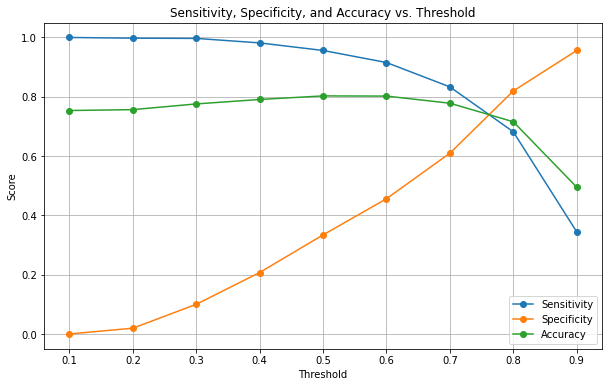

In [110]:
import numpy as np
import xgboost as xgb
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Assuming X_train, X_test, y_train, y_test are already defined

# Create and train the XGBoost classifier (uncomment and define if not already defined)
# clf = xgb.XGBClassifier(random_state=42)
# clf.fit(X_train, y_train)

# Make predictions on the test data (probabilities)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Initialize lists to store sensitivity, specificity, and accuracy for each threshold
thresholds = np.arange(0.1, 0.91, 0.1)
sensitivities = []
specificities = []
accuracies = []

# Calculate sensitivity, specificity, and accuracy for each threshold
for threshold in thresholds:
    y_pred_adjusted = (y_pred_proba >= threshold).astype(int)
    conf_matrix = confusion_matrix(y_test, y_pred_adjusted)
    tn, fp, fn, tp = conf_matrix.ravel()
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    accuracy = accuracy_score(y_test, y_pred_adjusted)
    sensitivities.append(sensitivity)
    specificities.append(specificity)
    accuracies.append(accuracy)
    print(f"Threshold: {threshold:.1f}, Sensitivity: {sensitivity:.4f}, Specificity: {specificity:.4f}, Accuracy: {accuracy:.4f}")

# Plot sensitivity, specificity, and accuracy vs. threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, sensitivities, marker='o', label='Sensitivity')
plt.plot(thresholds, specificities, marker='o', label='Specificity')
plt.plot(thresholds, accuracies, marker='o', label='Accuracy')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Sensitivity, Specificity, and Accuracy vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()


In [112]:
X_train

,age_of_onset,gender,country,employment,number_of_children,number_of_daily_contacts,case_definition,type_of_resistance,bmi,lung_localization,...,mediumnodules,largenodules,hugenodules,isanycalcifiedorpartiallycalcifiednoduleexist,isanynoncalcifiednoduleexist,isanyclusterednoduleexists,aremultiplenoduleexists,lowgroundglassdensityactivefreshnodules,mediumdensitystabalizedfibroticnodules,highdensitycalcifiedtypicallysequella
5180,28,0,7,1,1.00,2.00,2,5,20.70,1.00,...,1.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,0.00
6425,54,0,7,7,0.00,2.00,2,4,21.30,1.00,...,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00
5591,27,0,7,0,3.00,4.00,1,5,18.30,1.00,...,1.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,0.00
2470,24,0,3,7,1.00,3.00,2,0,20.56,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
369,39,0,7,1,0.00,3.00,2,4,20.56,1.00,...,1.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,56,0,12,7,0.00,1.00,3,0,20.80,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
3575,34,1,7,7,0.00,0.00,2,0,19.70,1.00,...,2.00,0.00,0.00,0.00,6.00,4.00,2.00,4.00,2.00,0.00
3829,33,1,1,7,0.00,0.00,2,0,21.00,1.00,...,1.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,0.00
7166,25,1,3,7,0.64,2.17,2,4,20.56,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00


In [117]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Define the MLP model with a suggested architecture
mlp_clf = MLPClassifier(
    hidden_layer_sizes=(128, 64, 32),  # Suggested configuration with 2 layers
    activation='relu',            # Activation function
    solver='adam',                # Optimization algorithm
    alpha=0.0001,                 # L2 regularization term (can be tuned)
    max_iter=300,                 # Maximum number of iterations
    random_state=42
)

# Create a pipeline with feature scaling
pipeline = Pipeline([
    # ('scaler', StandardScaler()),  # Feature scaling (important for MLP)
    ('mlp', mlp_clf)
])

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred_proba_mlp = pipeline.predict_proba(X_test)[:, 1]
y_pred_mlp = pipeline.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred_mlp)
auc = roc_auc_score(y_test, y_pred_proba_mlp)
conf_matrix = confusion_matrix(y_test, y_pred_mlp)
tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

print(f"Accuracy: {accuracy:.4f}")
print(f"AUC: {auc:.4f}")
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")

    

Accuracy: 0.7638
AUC: 0.6760
Sensitivity: 0.9043
Specificity: 0.3341


In [119]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

# Define learning rates to test
learning_rates = [1e-7, 1e-6,1e-5,1e-4, 0.001]

# Initialize lists to store results
results = []

# Loop through different learning rates
for lr in learning_rates:
    print(f"Testing with learning rate: {lr}")
    
    # Define the MLP model with the current learning rate
    mlp_clf = MLPClassifier(
        hidden_layer_sizes=(128, 64, 32),  # Suggested configuration with 3 layers
        activation='relu',                 # Activation function
        solver='adam',                     # Optimization algorithm
        alpha=0.0001,                      # L2 regularization term (can be tuned)
        learning_rate_init=lr,             # Set the learning rate
        max_iter=300,                      # Maximum number of iterations
        random_state=42
    )

    # Create a pipeline with feature scaling
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Feature scaling (important for MLP)
        ('mlp', mlp_clf)
    ])

    # Fit the model
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred_proba_mlp = pipeline.predict_proba(X_test)[:, 1]
    y_pred_mlp = pipeline.predict(X_test)

    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred_mlp)
    auc = roc_auc_score(y_test, y_pred_proba_mlp)
    conf_matrix = confusion_matrix(y_test, y_pred_mlp)
    tn, fp, fn, tp = conf_matrix.ravel()
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

    # Print results for current learning rate
    print(f"Accuracy: {accuracy:.4f}")
    print(f"AUC: {auc:.4f}")
    print(f"Sensitivity: {sensitivity:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print("-" * 50)
    
    # Store results
    results.append({
        'learning_rate': lr,
        'accuracy': accuracy,
        'auc': auc,
        'sensitivity': sensitivity,
        'specificity': specificity
    })

# Convert results to DataFrame for better visualization (optional)
import pandas as pd
results_df = pd.DataFrame(results)
print("\nSummary of Results:")
print(results_df)


Testing with learning rate: 1e-07


Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.


Accuracy: 0.6118
AUC: 0.5635
Sensitivity: 0.6858
Specificity: 0.3854
--------------------------------------------------
Testing with learning rate: 1e-06


Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.


Accuracy: 0.7554
AUC: 0.6208
Sensitivity: 0.9976
Specificity: 0.0146
--------------------------------------------------
Testing with learning rate: 1e-05


Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.


Accuracy: 0.7861
AUC: 0.7750
Sensitivity: 0.9522
Specificity: 0.2780
--------------------------------------------------
Testing with learning rate: 0.0001


Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.


Accuracy: 0.7704
AUC: 0.7054
Sensitivity: 0.8836
Specificity: 0.4244
--------------------------------------------------
Testing with learning rate: 0.001
Accuracy: 0.7344
AUC: 0.6885
Sensitivity: 0.8317
Specificity: 0.4366
--------------------------------------------------

Summary of Results:
   learning_rate  accuracy  auc  sensitivity  specificity
0           0.00      0.61 0.56         0.69         0.39
1           0.00      0.76 0.62         1.00         0.01
2           0.00      0.79 0.77         0.95         0.28
3           0.00      0.77 0.71         0.88         0.42
4           0.00      0.73 0.69         0.83         0.44


emsembling

In [85]:
from sklearn.ensemble import VotingClassifier

ensemble_clf = VotingClassifier(
    estimators=[
        ('xgb', xgb.XGBClassifier(**best_params, random_state=42)),
        ('lgbm', LGBMClassifier(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42))
    ],
    voting='soft'
)

ensemble_clf.fit(X_train, y_train)
y_pred_ensemble = ensemble_clf.predict(X_test)
y_pred_proba_ensemble = ensemble_clf.predict_proba(X_test)[:, 1]  # Get probability for the positive class

# Calculate accuracy
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)

# Calculate AUC
auc_ensemble = roc_auc_score(y_test, y_pred_proba_ensemble)

# Calculate sensitivity and specificity
conf_matrix_ensemble = confusion_matrix(y_test, y_pred_ensemble)
tn, fp, fn, tp = conf_matrix_ensemble.ravel()
sensitivity_ensemble = tp / (tp + fn) if (tp + fn) > 0 else 0  # True Positive Rate
specificity_ensemble = tn / (tn + fp) if (tn + fp) > 0 else 0  # True Negative Rate

# Print evaluation metrics for the ensemble model
print("Ensemble Classifier Performance:")
print(f"Accuracy: {accuracy_ensemble:.4f}")
print(f"AUC: {auc_ensemble:.4f}")
print(f"Sensitivity: {sensitivity_ensemble:.4f}")
print(f"Specificity: {specificity_ensemble:.4f}")

# Print classification report for more detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred_ensemble))

# Optional: Confusion Matrix Plot
# import seaborn as sns
# import matplotlib.pyplot as plt

# plt.figure(figsize=(6, 4))
# sns.heatmap(conf_matrix_ensemble, annot=True, fmt='d', cmap='Blues')
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.show()

[LightGBM] [Info] Number of positive: 5013, number of negative: 1639
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005175 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1463
[LightGBM] [Info] Number of data points in the train set: 6652, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.753608 -> initscore=1.117948
[LightGBM] [Info] Start training from score 1.117948
Ensemble Classifier Performance:
Accuracy: 0.8059
AUC: 0.8224
Sensitivity: 0.9522
Specificity: 0.3585

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.36      0.48       410
           1       0.82      0.95      0.88      1254

    accuracy                           0.81      1664
   macro avg       0.76      0.66      0.68      1664
weighted avg       0.79      0.81      0.78      1664



ModuleNotFoundError: No module named 'seaborn'

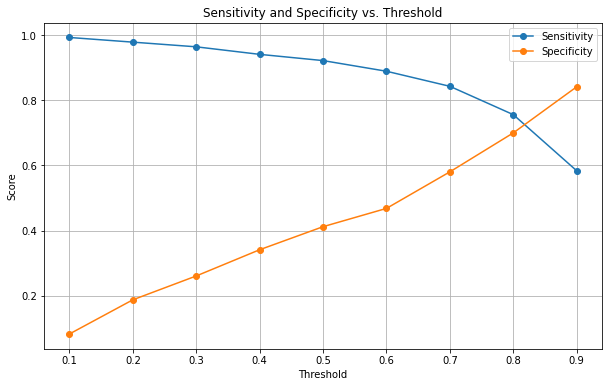

In [78]:
import numpy as np
import xgboost as xgb
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Assuming X_train, X_test, y_train, y_test are already defined

# Create and train the XGBoost classifier
clf = xgb.XGBClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test data (probabilities)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Initialize lists to store sensitivity and specificity for each threshold
thresholds = np.arange(0.1, 0.91, 0.1)
sensitivities = []
specificities = []

# Calculate sensitivity and specificity for each threshold
for threshold in thresholds:
    y_pred_adjusted = (y_pred_proba >= threshold).astype(int)
    conf_matrix = confusion_matrix(y_test, y_pred_adjusted)
    tn, fp, fn, tp = conf_matrix.ravel()
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    sensitivities.append(sensitivity)
    specificities.append(specificity)

# Plot sensitivity and specificity vs. threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, sensitivities, marker='o', label='Sensitivity')
plt.plot(thresholds, specificities, marker='o', label='Specificity')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Sensitivity and Specificity vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()


### no weighting

In [132]:
# clf = xgb.XGBClassifier(class_weight={0: class_weights[0], 1: class_weights[1]})
clf = xgb.XGBClassifier()

# Train the model with sample weights
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate AUC
auc = roc_auc_score(y_test, y_pred_proba)

# Calculate sensitivity and specificity
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp + fn)  # Also known as Recall or True Positive Rate
specificity = tn / (tn + fp)  # True Negative Rate

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC: {auc:.4f}")
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")

# Print classification report for more detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7963
AUC: 0.7985
Sensitivity: 0.9219
Specificity: 0.4122

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.41      0.50       410
           1       0.83      0.92      0.87      1254

    accuracy                           0.80      1664
   macro avg       0.73      0.67      0.69      1664
weighted avg       0.78      0.80      0.78      1664



In [33]:

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

  0%|          | 0/29 [00:00<?, ?it/s]

 97%|█████████▋| 28/29 [01:02<00:00,  1.12it/s]

[LightGBM] [Info] Number of positive: 5013, number of negative: 1639
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005536 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1481
[LightGBM] [Info] Number of data points in the train set: 6652, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.753608 -> initscore=1.117948
[LightGBM] [Info] Start training from score 1.117948


100%|██████████| 29/29 [01:02<00:00,  2.17s/it]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score   
Model                                                                           
BaggingClassifier                  0.78               0.68     0.68      0.77  \
LGBMClassifier                     0.80               0.67     0.67      0.79   
XGBClassifier                      0.80               0.67     0.67      0.78   
NearestCentroid                    0.71               0.66     0.66      0.72   
AdaBoostClassifier                 0.80               0.65     0.65      0.78   
ExtraTreesClassifier               0.80               0.65     0.65      0.78   
RandomForestClassifier             0.80               0.65     0.65      0.78   
DecisionTreeClassifier             0.72               0.63     0.63      0.72   
QuadraticDiscriminantAnalysis      0.75               0.62     0.62      0.74   
BernoulliNB                        0.73               0.62     0.62      0.73   
LabelPropagation            

### TabPFN

In [34]:
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from tabpfn import TabPFNClassifier

X = Clinical_data.drop('outcome', axis=1)
y = Clinical_data['outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
classifier = TabPFNClassifier(device='cpu', N_ensemble_configurations=32)

classifier.fit(X_train, y_train,  overwrite_warning=True)
y_eval, p_eval = classifier.predict(X_test, return_winning_probability=True)

print('Accuracy', accuracy_score(y_test, y_eval))

Accuracy 0.7932692307692307


In [35]:
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score

auc = roc_auc_score(y_test, y_eval)
print("AUC:", auc)

# Calculate confusion matrix components
conf_matrix = confusion_matrix(y_test, y_eval)
print("Confusion Matrix:\n", conf_matrix)
tn, fp, fn, tp = confusion_matrix(y_test, y_eval).ravel()

# Calculate sensitivity (recall)
sensitivity = tp / (tp + fn)
print("Sensitivity:", sensitivity)

# Calculate specificity
specificity = tn / (tn + fp)
print("Specificity:", specificity)

AUC: 0.6166024818142919
Confusion Matrix:
 [[ 110  300]
 [  44 1210]]
Sensitivity: 0.9649122807017544
Specificity: 0.2682926829268293


### lgb

In [36]:
Clinical_data.columns = [col.replace(' ', '_').replace('(', '').replace(')', '').replace('-', '_').replace(':', '') for col in Clinical_data.columns]
X = Clinical_data.drop('outcome', axis=1)
y = Clinical_data['outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

LightGBM Accuracy: 0.8058894230769231
LightGBM Feature Importances: [378  38 123 108  92 118 111 145 347  18 143 173   9  25 155 152  48  62
  10   4   8  30  19  41  34  22  22  13  63  64  17  62  60  26   8  35
  45  22  39  51  41  19]
LightGBM Feature Importances: [378  38 123 108  92 118 111 145 347  18 143 173   9  25 155 152  48  62
  10   4   8  30  19  41  34  22  22  13  63  64  17  62  60  26   8  35
  45  22  39  51  41  19]


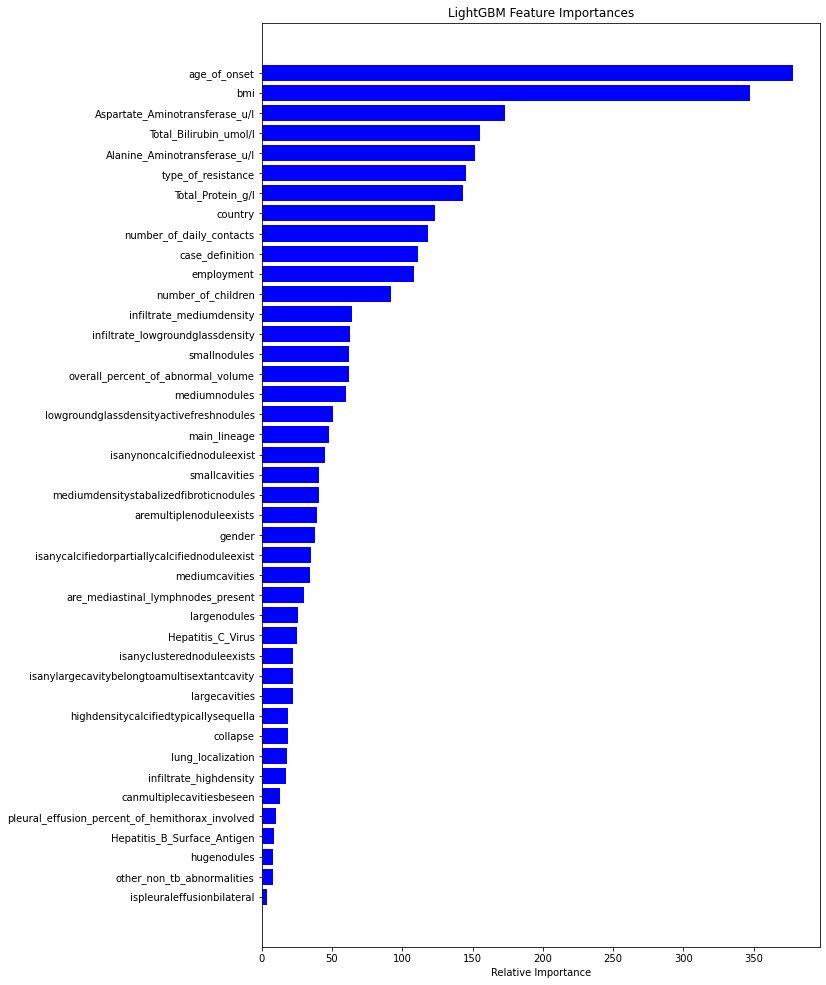

In [37]:
import lightgbm as lgb 
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

lgb_clf = lgb.LGBMClassifier(learning_rate=0.1, max_depth=-1, n_estimators=100, num_leaves=31, verbose = -1)
lgb_clf.fit(X_train, y_train)
lgb_predictions = lgb_clf.predict(X_test)
print(f'LightGBM Accuracy: {accuracy_score(y_test, lgb_predictions)}')

lgb_feature_importances = lgb_clf.feature_importances_
print(f'LightGBM Feature Importances: {lgb_feature_importances}')
# plot_feature_importance(lgb_feature_importances, feature_names, 'LightGBM Feature Importances')




import matplotlib.pyplot as plt
import numpy as np

# Assuming the feature names are available in a list called feature_names
feature_names = X.columns  # Example, if using a dataset like Iris from sklearn

# Function to plot feature importance

# LightGBM Feature Importance
lgb_feature_importances = lgb_clf.feature_importances_
print(f'LightGBM Feature Importances: {lgb_feature_importances}')
plot_feature_importance(lgb_feature_importances, feature_names, 'LightGBM Feature Importances')


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


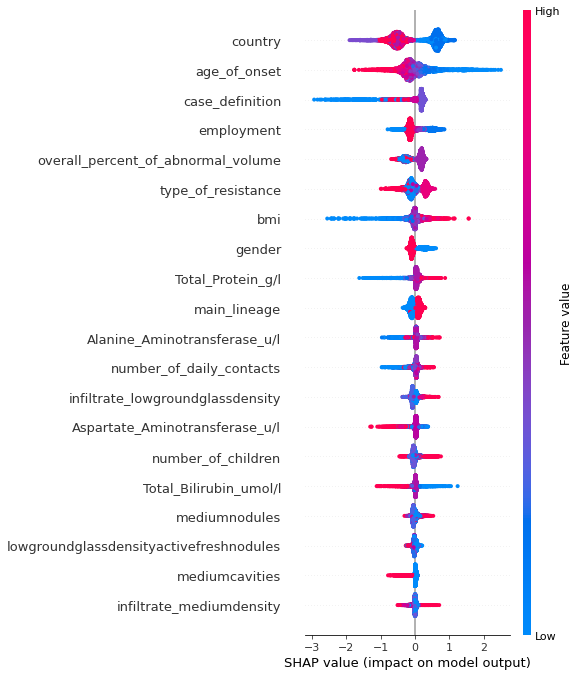

In [38]:
import shap
# Assuming Clinical_data is a pandas DataFrame with the necessary data
X = Clinical_data.drop('outcome', axis=1)
y = Clinical_data['outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
lgb_clf = lgb.LGBMClassifier(learning_rate=0.1, max_depth=-1, n_estimators=100, num_leaves=31, verbose = -1)
lgb_clf.fit(X_train, y_train)
explainer = shap.TreeExplainer(lgb_clf)
shap_values = explainer.shap_values(X_train)
# For classification, shap_values returns a list of arrays (one for each class)
# Use the shap values for the class of interest (here, assuming binary classification)
shap.summary_plot(shap_values[1], X_train)

### catboost

In [39]:
import catboost as cb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming Clinical_data is already defined and loaded

# Prepare the data
X = Clinical_data.drop('outcome', axis=1)
y = Clinical_data['outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the CatBoostClassifier
model = cb.CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    eval_metric='Accuracy',
    random_seed=42,
    verbose=100,
    early_stopping_rounds=100
)

# Train the model
model.fit(X_train, y_train, eval_set=(X_test, y_test), use_best_model=True)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Feature importance
importances = model.get_feature_importance()
feature_names = X.columns
feature_importances = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

print("Feature Importances:")
for feature, importance in feature_importances:
    print(f"{feature}: {importance}")


ModuleNotFoundError: No module named 'catboost'

### model parameter grid search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier

# Create a parameter grid for each model
param_grid_lgbm = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7]
}

param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

param_grid_extra_trees = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

param_grid_bagging = {
    'n_estimators': [10, 50],
    'max_samples': [0.5, 1.0],
    'max_features': [0.5, 1.0]
}

param_grid_catboost = {
    'iterations': [100, 200],
    'depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'l2_leaf_reg': [1, 3, 5]
}

# Initialize the models
lgbm = lgb.LGBMClassifier()
rf = RandomForestClassifier()
extra_trees = ExtraTreesClassifier()
bagging = BaggingClassifier(base_estimator=RandomForestClassifier())
catboost = CatBoostClassifier(silent=True)

# Perform grid search for each model
grid_lgbm = GridSearchCV(estimator=lgbm, param_grid=param_grid_lgbm, cv=3, scoring='accuracy')
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=3, scoring='accuracy')
grid_extra_trees = GridSearchCV(estimator=extra_trees, param_grid=param_grid_extra_trees, cv=3, scoring='accuracy')
grid_bagging = GridSearchCV(estimator=bagging, param_grid=param_grid_bagging, cv=3, scoring='accuracy')
grid_catboost = GridSearchCV(estimator=catboost, param_grid=param_grid_catboost, cv=3, scoring='accuracy')

# Fit the models to the data
X_train, y_train = ...  # Replace with your training data
grid_lgbm.fit(X_train, y_train)
grid_rf.fit(X_train, y_train)
grid_extra_trees.fit(X_train, y_train)
grid_bagging.fit(X_train, y_train)
grid_catboost.fit(X_train, y_train)

# Print the best parameters and scores for each model
print("Best parameters for LGBM: ", grid_lgbm.best_params_)
print("Best score for LGBM: ", grid_lgbm.best_score_)

print("Best parameters for RF: ", grid_rf.best_params_)
print("Best score for RF: ", grid_rf.best_score_)

print("Best parameters for Extra Trees: ", grid_extra_trees.best_params_)
print("Best score for Extra Trees: ", grid_extra_trees.best_score_)

print("Best parameters for Bagging: ", grid_bagging.best_params_)
print("Best score for Bagging: ", grid_bagging.best_score_)

print("Best parameters for CatBoost: ", grid_catboost.best_params_)
print("Best score for CatBoost: ", grid_catboost.best_score_)


### emsemble

In [65]:
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.semi_supervised import LabelSpreading, LabelPropagation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import PassiveAggressiveClassifier, LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score


# Define the classifiers
classifiers = [
    ('hist_gb', HistGradientBoostingClassifier(random_state=42)),
    # ('xgb', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', verbose=-1)),
    ('lgbm', LGBMClassifier(learning_rate=0.1, max_depth=-1, n_estimators=100, num_leaves=31, random_state=42, verbose=-1)),
    ('rf', Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('clf', RandomForestClassifier(random_state=42))
    ])),
    # ('ada', Pipeline([
    #     ('imputer', SimpleImputer(strategy='mean')),
    #     ('clf', AdaBoostClassifier(random_state=42))
    # ])),
    ('et', Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('clf', ExtraTreesClassifier(random_state=42))
    ])),
    ('bagging', Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('clf', BaggingClassifier(random_state=42))
    ])),
    # ('lr', Pipeline([
    #     ('imputer', SimpleImputer(strategy='mean')),
    #     ('lr', LogisticRegression(random_state=42))
    # ]))
    # ('ls', Pipeline([
    #     ('imputer', SimpleImputer(strategy='mean')),
    #     ('clf',LabelSpreading())
    # # ])),
    # ('lp', Pipeline([
    #     ('imputer', SimpleImputer(strategy='mean')),
    #     ('clf',LabelPropagation())
    # ])),
    # ('knn', Pipeline([
    #     ('imputer', SimpleImputer(strategy='mean')),
    #     ('clf', KNeighborsClassifier())
    # ])),
    # ('svc', Pipeline([
    #     ('imputer', SimpleImputer(strategy='mean')),
    #     ('clf', SVC(probability=True, random_state=42))
    # ])),
    # ('pa', Pipeline([
    #     ('imputer', SimpleImputer(strategy='mean')),
    #     ('clf', PassiveAggressiveClassifier(random_state=42))
    # ])),
    # ('bnb', Pipeline([
    #     ('imputer', SimpleImputer(strategy='mean')),
    #     ('clf', BernoulliNB())
    # ]))
]

# Create the VotingClassifier
voting_clf = VotingClassifier(estimators=classifiers, voting='soft')

# Train the VotingClassifier
voting_clf.fit(X_train, y_train)

# Predict on the test data
test_predictions = voting_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, test_predictions)
print("VotingClassifier Accuracy:", accuracy)


VotingClassifier Accuracy: 0.8082932692307693


In [74]:
y.value_counts()

outcome
1    6267
0    2049
Name: count, dtype: int64

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from sklearn.ensemble import HistGradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from lightgbm import LGBMClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import pandas as pd

# Assuming X and y are defined in your dataset
# Replace this with your actual Clinical_data dataset and target
X = Clinical_data.drop('outcome', axis=1)
y = Clinical_data['outcome']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Calculate class weights for the weighted XGBoost model (for binary classification)
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))
scale_pos_weight = class_weight_dict[0] / class_weight_dict[1]

# Define the classifiers with and without weighting
classifiers = [
    ('hist_gb', HistGradientBoostingClassifier(random_state=42)),
    ('xgb', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', verbosity=0)),
    ('xgb_weighted', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', verbosity=0, scale_pos_weight=scale_pos_weight)),
    ('lgbm', LGBMClassifier(learning_rate=0.1, max_depth=-1, n_estimators=100, num_leaves=31, random_state=42, verbose=-1)),
    ('rf', Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('clf', RandomForestClassifier(random_state=42))
    ])),
    ('et', Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('clf', ExtraTreesClassifier(random_state=42))
    ])),
    ('bagging', Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('clf', BaggingClassifier(random_state=42))
    ])),
]

# Function to calculate sensitivity and specificity
def calculate_sensitivity_specificity(y_true, y_pred):
    conf_matrix = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = conf_matrix.ravel()
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    return sensitivity, specificity

# Initialize lists to store overall metrics
overall_accuracy = []
overall_auc = []
overall_sensitivity = []
overall_specificity = []

# Train and evaluate each classifier
for name, clf in classifiers:
    # Train the classifier
    clf.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = clf.predict(X_test)
    y_pred_proba = clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else None
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    overall_accuracy.append(accuracy)
    
    # Calculate AUC if available
    auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    if auc is not None:
        overall_auc.append(auc)
    
    # Calculate sensitivity and specificity
    sensitivity, specificity = calculate_sensitivity_specificity(y_test, y_pred)
    overall_sensitivity.append(sensitivity)
    overall_specificity.append(specificity)
    
    # Print evaluation metrics for the classifier
    print(f"\nClassifier: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    if auc is not None:
        print(f"AUC: {auc:.4f}")
    print(f"Sensitivity: {sensitivity:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(classification_report(y_test, y_pred))

# Calculate and print overall metrics
print("\nOverall Metrics:")
print(f"Average Accuracy: {np.mean(overall_accuracy):.4f}")
print(f"Average AUC: {np.mean(overall_auc):.4f}" if overall_auc else "AUC not available for all classifiers")
print(f"Average Sensitivity: {np.mean(overall_sensitivity):.4f}")
print(f"Average Specificity: {np.mean(overall_specificity):.4f}")



Classifier: hist_gb
Accuracy: 0.8053
AUC: 0.8126
Sensitivity: 0.9394
Specificity: 0.3951
              precision    recall  f1-score   support

           0       0.68      0.40      0.50       410
           1       0.83      0.94      0.88      1254

    accuracy                           0.81      1664
   macro avg       0.75      0.67      0.69      1664
weighted avg       0.79      0.81      0.79      1664


Classifier: xgb
Accuracy: 0.7963
AUC: 0.7985
Sensitivity: 0.9219
Specificity: 0.4122
              precision    recall  f1-score   support

           0       0.63      0.41      0.50       410
           1       0.83      0.92      0.87      1254

    accuracy                           0.80      1664
   macro avg       0.73      0.67      0.69      1664
weighted avg       0.78      0.80      0.78      1664


Classifier: xgb_weighted
Accuracy: 0.7999
AUC: 0.7992
Sensitivity: 0.9665
Specificity: 0.2902
              precision    recall  f1-score   support

           0       0

VotingClassifier Accuracy: 0.8082932692307693
Confusion Matrix:
 [[ 154  256]
 [  63 1191]]
Recall: 0.9497607655502392
Specificity: 0.375609756097561
ROC-AUC Score: 0.8216439102190065


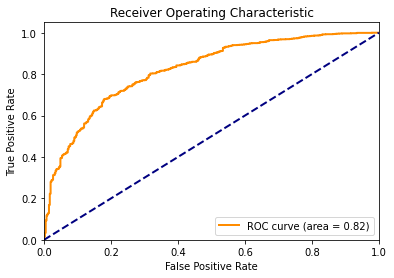

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.38      0.49       410
           1       0.82      0.95      0.88      1254

    accuracy                           0.81      1664
   macro avg       0.77      0.66      0.69      1664
weighted avg       0.80      0.81      0.79      1664



In [66]:
from sklearn.metrics import confusion_matrix, recall_score, roc_auc_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Train the VotingClassifier
voting_clf.fit(X_train, y_train)

# Predict on the test data
test_predictions = voting_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, test_predictions)
print("VotingClassifier Accuracy:", accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:\n", conf_matrix)

# Recall
recall = recall_score(y_test, test_predictions)
print("Recall:", recall)

# Specificity
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)
print("Specificity:", specificity)

# ROC-AUC Score
y_test_prob = voting_clf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_test_prob)
print("ROC-AUC Score:", roc_auc)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
roc_auc_value = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_value)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, test_predictions))

## Weighted

VotingClassifier Accuracy: 0.8389328063241107
Confusion Matrix:
 [[ 215  243]
 [  83 1483]]
Recall: 0.9469987228607918
Specificity: 0.46943231441048033
ROC-AUC Score: 0.8430694284104914


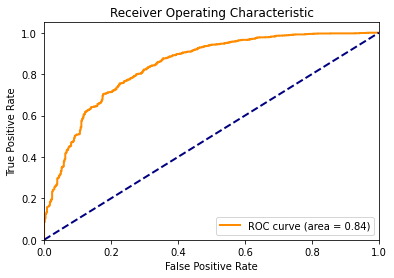

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.47      0.57       458
           1       0.86      0.95      0.90      1566

    accuracy                           0.84      2024
   macro avg       0.79      0.71      0.73      2024
weighted avg       0.83      0.84      0.83      2024



In [37]:
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import HistGradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from lightgbm import LGBMClassifier
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Define your classifiers
classifiers = [
    ('hist_gb', HistGradientBoostingClassifier(random_state=42)),
    ('lgbm', LGBMClassifier(learning_rate=0.1, max_depth=-1, n_estimators=100, num_leaves=31, random_state=42, verbose=-1)),
    ('rf', Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('clf', RandomForestClassifier(random_state=42))
    ])),
    ('et', Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('clf', ExtraTreesClassifier(random_state=42))
    ])),
    ('bagging', Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('clf', BaggingClassifier(random_state=42))
    ]))
]

# Calculate sample weights based on class distribution
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

# Create a dictionary to store trained classifiers
trained_classifiers = []

# Train each classifier with sample weights
for name, clf in classifiers:
    if isinstance(clf, Pipeline):
        # If classifier is a pipeline, fit it with sample weights
        clf.fit(X_train, y_train, clf__sample_weight=sample_weights)
    else:
        # Otherwise, fit the classifier with sample weights
        clf.fit(X_train, y_train, sample_weight=sample_weights)
    trained_classifiers.append((name, clf))

# Create the VotingClassifier with trained classifiers
voting_clf = VotingClassifier(estimators=trained_classifiers, voting='soft')

# Train the VotingClassifier (sample weights are already applied to individual classifiers)
voting_clf.fit(X_train, y_train)

# Predict on the test data
test_predictions = voting_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, test_predictions)
print("VotingClassifier Accuracy:", accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:\n", conf_matrix)

# Recall
recall = recall_score(y_test, test_predictions)
print("Recall:", recall)

# Specificity
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)
print("Specificity:", specificity)

# ROC-AUC Score
y_test_prob = voting_clf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_test_prob)
print("ROC-AUC Score:", roc_auc)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
roc_auc_value = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_value)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, test_predictions))


### lgbm

In [ ]:
class_counts = np.bincount(y_train)
class_weights = class_counts / len(y_train)

In [40]:
np.unique(sample_weights)

array([0.64632588, 2.20851528])

[LightGBM] [Info] Number of positive: 6260, number of negative: 1832
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004574 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2193
[LightGBM] [Info] Number of data points in the train set: 8092, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
LightGBM Accuracy: 0.7850790513833992
LightGBM Confusion Matrix:
 [[ 321  137]
 [ 298 1268]]
LightGBM Recall: 0.80970625798212
LightGBM Specificity: 0.7008733624454149
LightGBM Precision: 0.902491103202847
LightGBM F1 Score: 0.853584651632447
LightGBM ROC-AUC Score: 0.8372323724115623


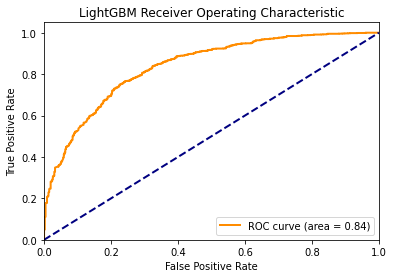

LightGBM Feature Importances: [404  43 136 110  81 159 117 146 449  10 143 176  21  48   3 158 171 158
 164 186   7  94   0   0   0  16   0]


In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
import lightgbm as lgb

lgb_clf = lgb.LGBMClassifier(learning_rate=0.1, max_depth=-1, n_estimators=100, num_leaves=31, class_weight='balanced', random_state=42)
lgb_clf.fit(X_train, y_train)
lgb_predictions = lgb_clf.predict(X_test)
print(f'LightGBM Accuracy: {accuracy_score(y_test, lgb_predictions)}')

# lgb_feature_importances = lgb_clf.feature_importances_
# print(f'LightGBM Feature Importances: {lgb_feature_importances}')
# plot_feature_importance(lgb_feature_importances, feature_names, 'LightGBM Feature 
# Confusion Matrix for LightGBM
lgb_conf_matrix = confusion_matrix(y_test, lgb_predictions)
print("LightGBM Confusion Matrix:\n", lgb_conf_matrix)

# Recall for LightGBM
lgb_recall = recall_score(y_test, lgb_predictions)
print("LightGBM Recall:", lgb_recall)

# Specificity for LightGBM
lgb_tn, lgb_fp, lgb_fn, lgb_tp = lgb_conf_matrix.ravel()
lgb_specificity = lgb_tn / (lgb_tn + lgb_fp)
print("LightGBM Specificity:", lgb_specificity)

# Precision for LightGBM
lgb_precision = precision_score(y_test, lgb_predictions)
print("LightGBM Precision:", lgb_precision)

# F1 Score for LightGBM
lgb_f1 = f1_score(y_test, lgb_predictions)
print("LightGBM F1 Score:", lgb_f1)

# ROC-AUC Score for LightGBM
lgb_y_test_prob = lgb_clf.predict_proba(X_test)[:, 1]
lgb_roc_auc = roc_auc_score(y_test, lgb_y_test_prob)
print("LightGBM ROC-AUC Score:", lgb_roc_auc)

# ROC Curve for LightGBM
lgb_fpr, lgb_tpr, _ = roc_curve(y_test, lgb_y_test_prob)
lgb_roc_auc_value = auc(lgb_fpr, lgb_tpr)

plt.figure()
plt.plot(lgb_fpr, lgb_tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % lgb_roc_auc_value)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LightGBM Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Feature Importances for LightGBM
lgb_feature_importances = lgb_clf.feature_importances_
print(f'LightGBM Feature Importances: {lgb_feature_importances}')
# Assuming feature_names is defined
# plot_feature_importance(lgb_feature_importances, feature_names, 'LightGBM Feature Importances')

## Feature selection

### rf

In [204]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Function to evaluate RFE with different numbers of features
def evaluate_rfe(n_features_to_select):
    rfe = RFE(estimator=model, n_features_to_select=n_features_to_select, step=1)
    rfe = rfe.fit(X_train, y_train)
    cv_scores = cross_val_score(rfe, X_train, y_train, cv=5)
    mean_cv_score = np.mean(cv_scores)
    selected_features = X_train.columns[rfe.support_]
    model.fit(X_train[selected_features], y_train)
    test_score = model.score(X_test[selected_features], y_test)
    return mean_cv_score, test_score, n_features_to_select, selected_features

# Test different numbers of features
feature_range = range(5, 78, 5)  # Testing from 5 to 75 features in steps of 5
results = []

for n_features in feature_range:
    mean_cv_score, test_score, n_features, selected_features = evaluate_rfe(n_features)
    results.append((n_features, mean_cv_score, test_score, selected_features))
    print(f"Features: {n_features}, CV Score: {mean_cv_score}, Test Score: {test_score}")
    print(f"Selected Features: {list(selected_features)}")

# Find the best number of features based on cross-validation score
best_result = max(results, key=lambda x: x[1])
print(f"\nBest result: Features: {best_result[0]}, CV Score: {best_result[1]}, Test Score: {best_result[2]}")
print(f"Selected Features: {list(best_result[3])}")

# Optionally, you can train the final model with the optimal number of features
best_n_features = best_result[0]
_, _, _, selected_features = evaluate_rfe(best_n_features)
model.fit(X_train[selected_features], y_train)
final_test_score = model.score(X_test[selected_features], y_test)
print(f"Final Test set score with {best_n_features} features: {final_test_score}")


Features: 5, CV Score: 0.7539083621902238, Test Score: 0.7866586538461539
Selected Features: ['age_of_onset', 'country', 'bmi', 'Total_Protein_g/l', 'Aspartate_Aminotransferase_u/l']
Features: 10, CV Score: 0.7940460844071109, Test Score: 0.7992788461538461
Selected Features: ['age_of_onset', 'country', 'number_of_daily_contacts', 'case_definition', 'type_of_resistance', 'bmi', 'Total_Protein_g/l', 'Aspartate_Aminotransferase_u/l', 'Alanine_Aminotransferase_u/l', 'smallnodules']
Features: 15, CV Score: 0.796750930670026, Test Score: 0.8173076923076923
Selected Features: ['age_of_onset', 'country', 'employment', 'number_of_daily_contacts', 'case_definition', 'type_of_resistance', 'bmi', 'Total_Protein_g/l', 'Aspartate_Aminotransferase_u/l', 'Total_Bilirubin_umol/l', 'Alanine_Aminotransferase_u/l', 'infiltrate_lowgroundglassdensity', 'smallnodules', 'mediumnodules', 'mediumdensitystabalizedfibroticnodules']
Features: 20, CV Score: 0.7969025493862378, Test Score: 0.8203125
Selected Featur